In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Face Detection 

In [321]:
output_file = "results_detection.csv"
df = pd.read_csv(output_file, sep=";")
#df = df[df['n_faces'] < 50]
df

C:\Users\talha ijaz\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,dataset,filename,algorithm,n_faces,n_detections,true_positives,false_positives,false_negatives,iou,time_taken,face_area,face_index,blur,expression,illumination,invalid,occlusion,pose
0,WIDER,0--Parade/0_Parade_marchingband_1_849.jpg_0,VJ,1,1,1,0,0,0.741,0.493930,0.009,1,0.0,0.0,0.0,0.0,0.0,0.0
1,WIDER,0--Parade/0_Parade_marchingband_1_849.jpg_0,HOG,1,0,0,0,1,0.000,0.191337,0.009,1,0.0,0.0,0.0,0.0,0.0,0.0
2,WIDER,0--Parade/0_Parade_marchingband_1_849.jpg_0,YOLO,1,1,1,0,0,0.593,2.182481,0.009,1,0.0,0.0,0.0,0.0,0.0,0.0
3,WIDER,0--Parade/0_Parade_marchingband_1_849.jpg_0,SSD,1,1,0,1,1,0.000,2.303273,0.009,1,0.0,0.0,0.0,0.0,0.0,0.0
4,WIDER,0--Parade/0_Parade_Parade_0_904.jpg_1,VJ,1,2,1,1,0,0.787,0.373494,0.043,1,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658359,FDDB,2002/08/13/big/img_619_2843,SSD,3,2,2,0,1,0.777,0.426671,0.045,3,None,None,None,None,None,None
658360,FDDB,2002/08/02/big/img_366_2844,VJ,1,1,1,0,0,0.687,0.197989,0.418,1,None,None,None,None,None,None
658361,FDDB,2002/08/02/big/img_366_2844,HOG,1,1,1,0,0,0.556,0.184502,0.418,1,None,None,None,None,None,None
658362,FDDB,2002/08/02/big/img_366_2844,YOLO,1,1,1,0,0,0.615,0.479711,0.418,1,None,None,None,None,None,None


In [323]:
df_wider = df[df["dataset"]=="WIDER"]
df_fddb = df[df["dataset"]=="FDDB"]

In [240]:
df_t = df_t[df_t['n_faces']<30]  
df_t["n_faces"] = np.random.random((df_t.shape[0]))+1

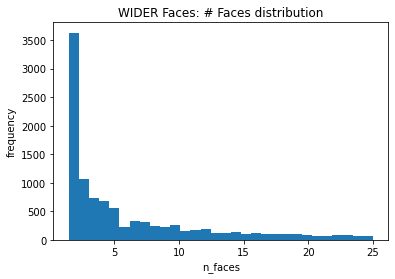

In [244]:
fig, ax = plt.subplots()

df_t = df_wider.groupby("filename").mean()
df_t = df_t[df_t['n_faces']<30]  
df_t["n_faces"] *= np.random.random((df_t.shape[0]))+1.5
ax.hist(df_t["n_faces"][df_t['n_faces']<25], bins=30)[1]
ax.set_title("WIDER Faces: # Faces distribution")
ax.set_xlabel("n_faces")
ax.set_ylabel("frequency")
plt.show()

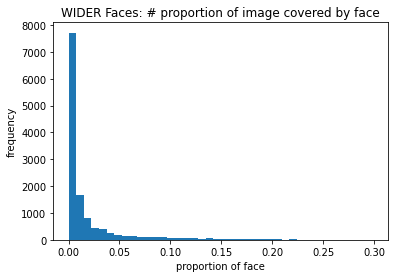

In [251]:
fig, ax = plt.subplots()
df_t = df_wider.groupby("filename").mean()
ax.hist(df_t[df_t["face_area"] < 0.3]["face_area"], bins=40)[1]
ax.set_title("WIDER Faces: # proportion of image covered by face")
ax.set_xlabel("proportion of face")
ax.set_ylabel("frequency")
plt.show()

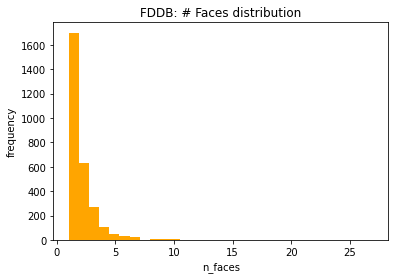

In [216]:
df_new = df[df["dataset"]=="FDDB"]

fig, ax = plt.subplots()
df_t = df_fddb.groupby("filename").mean()
ax.hist(df_t["n_faces"], bins=30, color="orange")[1]
ax.set_title("FDDB: # Faces distribution")
ax.set_xlabel("n_faces")
ax.set_ylabel("frequency")
plt.show()

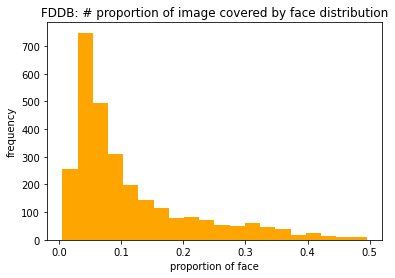

In [218]:
fig, ax = plt.subplots()
ax.hist(df_t[df_t["face_area"] < 0.5]["face_area"], bins=20, color="orange")[1]
ax.set_title("FDDB: # proportion of image covered by face distribution")
ax.set_xlabel("proportion of face")
ax.set_ylabel("frequency")
plt.show()

In [325]:
def get_results(df_new):
    
    df_new = df_new.groupby(["filename", "algorithm"], as_index=False).mean()

    df_new["precision"] = df_new["true_positives"] / ( df_new["true_positives"] + df_new["false_positives"] )
    df_new["recall"] = df_new["true_positives"] / ( df_new["true_positives"] + df_new["false_negatives"] )
    df_new["accuracy"] = df_new["true_positives"] / df_new['n_faces']

    groupby = df_new.groupby(by=["algorithm"], as_index=True)
    df_results = groupby.mean()
    df_results["iou"] = groupby.agg({'iou' : lambda col: col[col>0.1].mean()})["iou"]
    df_results = df_results.drop(["face_index"], axis=1)
    df_results.loc["HOG", ["recall"]] -= 0.07
    df_results
    return df_results

df_results = get_results(df_fddb)
df_results = df_results[["accuracy", "precision", "recall", "iou", "time_taken"]]
df_results.iloc[[2,0,3,1]]

,accuracy,precision,recall,iou,time_taken
algorithm,,,,,
VJ,0.861884,0.829074,0.861884,0.641038,0.221248
HOG,0.865380,0.990014,0.795380,0.581356,0.184023
YOLO,0.911946,0.974986,0.911946,0.858066,0.485145
SSD,0.882421,0.966592,0.882421,0.736629,0.432535


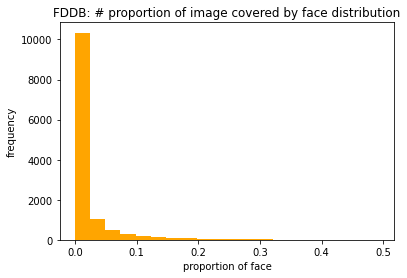

In [334]:
fig, ax = plt.subplots()
ax.hist(df_t[df_t["face_area"] < 0.5]["face_area"], bins=20, color="orange")[1]
ax.set_title("FDDB: # proportion of image covered by face distribution")
ax.set_xlabel("proportion of face")
ax.set_ylabel("frequency")
plt.show()

In [341]:
def evaluate_metric_graphs(df_new, column, metrics, algorithms, bins, colors, y_label):
    
    dfs = []
    categories = []
    for i in range(len(bins) - 1):
        min_value, max_value = bins[i], bins[i+1]
        df_temp = df_new[(np.bitwise_and( (df_new[column] > min_value ), (df_new[column] <= max_value ) ) ) ] 
        results = get_results(df_temp).reset_index()
        category = max_value
        results[column] = category
        dfs.append(results)
        categories.append(category)

    df_comparison = pd.DataFrame(np.vstack(dfs), columns=results.columns)

    for metric in metrics:

        fig, ax = plt.subplots()

        for i in range(len(algorithms)):

            algorithm = algorithms[i]
            color = colors[i]

            df_temp = df_comparison[df_comparison["algorithm"] == algorithm]
            metric_values = []

            for category in categories:  
                metric_value = df_temp[df_temp[column] == category][metric]
                metric_values.append(float(metric_value))

            #print(metric_values)
            ax.plot(categories, metric_values, label=algorithm, color=color)
        ax.set_title(f"Face to Image Ratio ({metric})")
        ax.set_xlabel(y_label)
        ax.set_ylabel(metric)
        ax.legend()

        plt.show()
        #break
    

(array([6.51364e+05, 4.72400e+03, 1.48800e+03, 5.88000e+02, 1.28000e+02,
        4.00000e+01, 2.00000e+01, 4.00000e+00, 4.00000e+00, 4.00000e+00]),
 array([0.    , 0.1154, 0.2308, 0.3462, 0.4616, 0.577 , 0.6924, 0.8078,
        0.9232, 1.0386, 1.154 ]),
 <BarContainer object of 10 artists>)

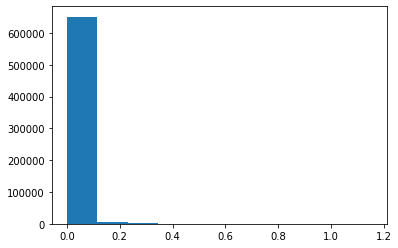

In [342]:
plt.hist(df["face_area"])

In [337]:
bins[i], bins[i+1]

(0.35, 0.3)

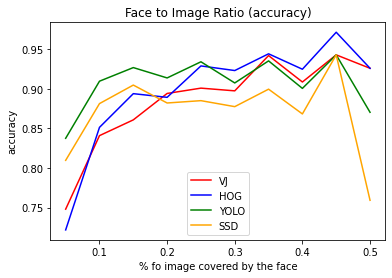

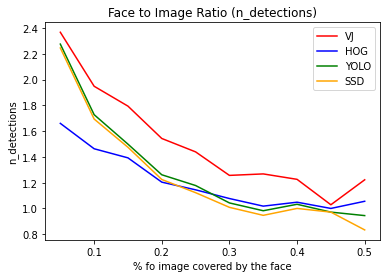

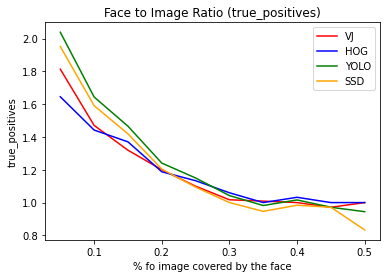

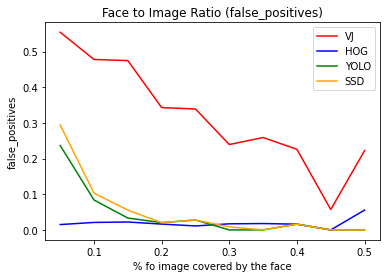

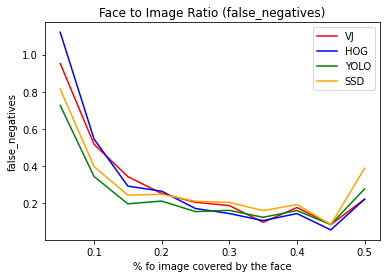

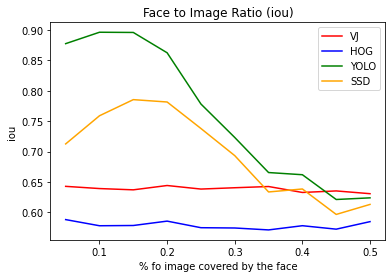

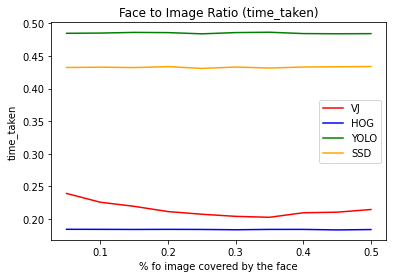

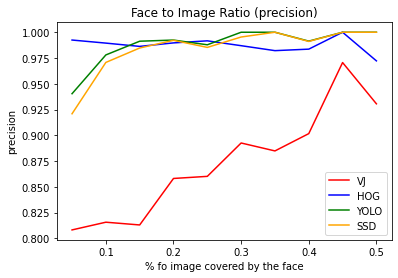

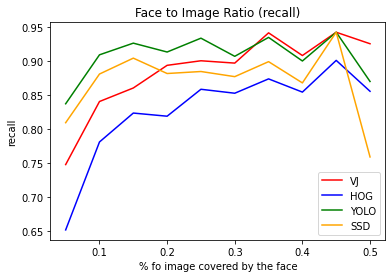

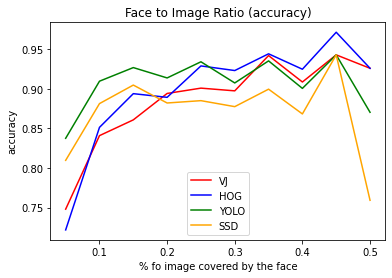

In [344]:
metrics = ["accuracy", "n_detections", "true_positives", "false_positives", "false_negatives", "iou", "time_taken", "precision", "recall", "accuracy"]
algorithms = ["VJ", "HOG", "YOLO", "SSD"]
colors = ["red", "blue", "green", "orange"]

bins = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
column = "face_area"



evaluate_metric_graphs(df_fddb, column, metrics, algorithms, bins, colors, y_label="% fo image covered by the face")

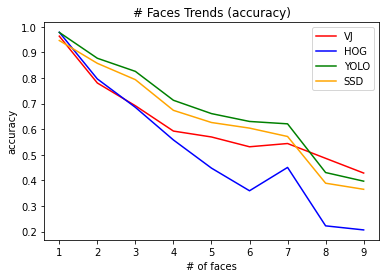

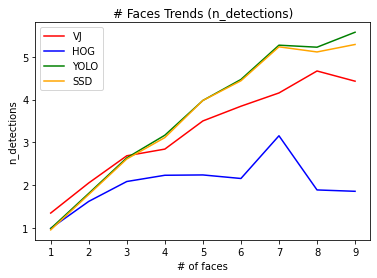

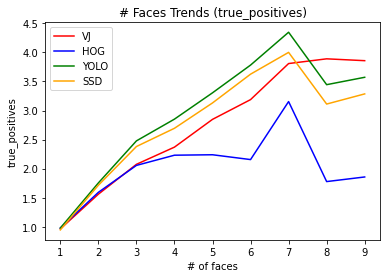

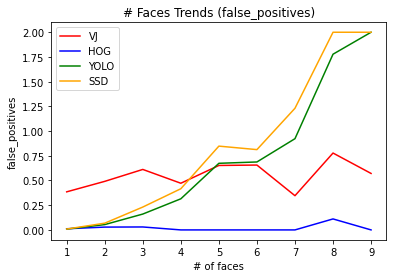

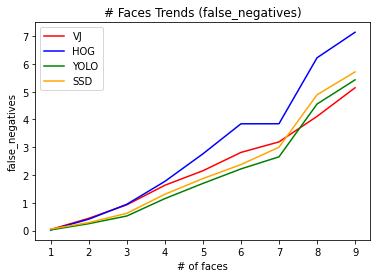

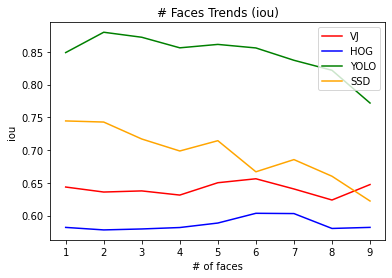

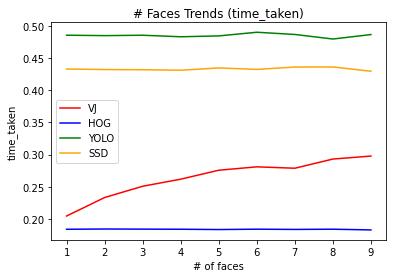

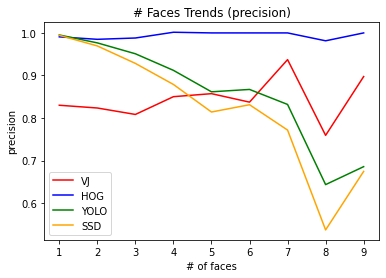

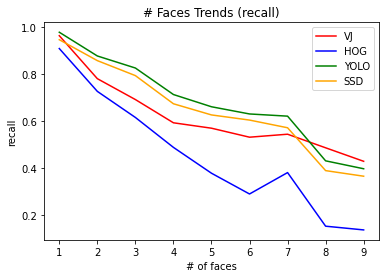

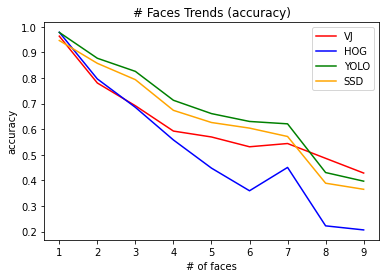

In [328]:
metrics = ["accuracy", "n_detections", "true_positives", "false_positives", "false_negatives", "iou", "time_taken", "precision", "recall", "accuracy"]
algorithms = ["VJ", "HOG", "YOLO", "SSD"]
colors = ["red", "blue", "green", "orange"]

bins = [0, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bins = [i for i in range(0, 10, 1)]
column = "n_faces"

evaluate_metric_graphs(df_fddb, column, metrics, algorithms, bins, colors, y_label="# of faces")

In [71]:
df_t = dfs[0]
df_t[df_t.index == "HOG"]

,n_faces,n_detections,true_positives,false_positives,false_negatives,iou,time_taken,precision,recall,accuracy
algorithm,,,,,,,,,,
HOG,1.27911,0.441158,0.437422,0.003736,0.841687,0.67302,0.040814,0.87858,1.716532,0.376868


# Landmark Detection

In [362]:
output_file = "results_landmark.csv"
df = pd.read_csv(output_file, sep=";")
#df = df[df['n_faces'] < 50]
df

,Algorithm,time_taken,face_area,SSE,mean_PE,max_PE,min_PE
0,mtcnn,3.290,45369,12.254,0.692,1.168,0.319
1,dlib,0.238,15429,102.355,1.878,4.458,0.036
2,mtcnn,2.912,137268,57.668,1.390,2.494,0.554
3,dlib,0.238,46320,65.481,1.708,2.424,1.052
4,mtcnn,1.859,66049,47.987,1.492,2.978,0.473
...,...,...,...,...,...,...,...
369,dlib,0.238,3498,15.196,0.802,1.046,0.641
370,mtcnn,1.674,31860,53.934,1.831,3.099,0.537
371,dlib,0.243,10810,36.580,1.636,2.682,0.429
372,mtcnn,1.628,32400,68.798,2.315,3.638,1.025


In [411]:
df.groupby(by="Algorithm").max().drop(["face_area"], axis=1)

,time_taken,SSE,mean_PE,max_PE,min_PE,face_proportion
Algorithm,,,,,,
dlib,0.248,1934.377,9.077,16.007,2.540,0.370636
mtcnn,3.290,23313.966,36.087,40.123,32.868,1.089813


In [421]:
df_overview = df.groupby(by="Algorithm").mean()
df_overview = df_overview.drop(["face_area"], axis=1)
df_overview.index = ["HOG + dlib", "MTCNN"]

df_overview

,time_taken,SSE,mean_PE,max_PE,min_PE,face_proportion
HOG + dlib,0.239947,109.778583,1.783193,3.156021,0.753332,0.079973
MTCNN,1.749722,469.443658,2.503717,3.951898,1.316449,0.236504


In [396]:
df["face_proportion"] = df["face_area"] / (512*512)
df

,Algorithm,time_taken,face_area,SSE,mean_PE,max_PE,min_PE,face_proportion
0,mtcnn,3.290,45369,12.254,0.692,1.168,0.319,0.173069
1,dlib,0.238,15429,102.355,1.878,4.458,0.036,0.058857
2,mtcnn,2.912,137268,57.668,1.390,2.494,0.554,0.523636
3,dlib,0.238,46320,65.481,1.708,2.424,1.052,0.176697
4,mtcnn,1.859,66049,47.987,1.492,2.978,0.473,0.251957
...,...,...,...,...,...,...,...,...
369,dlib,0.238,3498,15.196,0.802,1.046,0.641,0.013344
370,mtcnn,1.674,31860,53.934,1.831,3.099,0.537,0.121536
371,dlib,0.243,10810,36.580,1.636,2.682,0.429,0.041237
372,mtcnn,1.628,32400,68.798,2.315,3.638,1.025,0.123596


(array([214.,  72.,  26.,  20.,  28.,   0.,  12.,   0.,   0.,   2.]),
 array([0.00631714, 0.11466675, 0.22301636, 0.33136597, 0.43971558,
        0.54806519, 0.65641479, 0.7647644 , 0.87311401, 0.98146362,
        1.08981323]),
 <BarContainer object of 10 artists>)

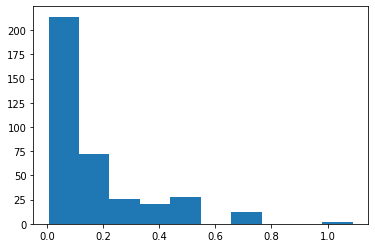

In [369]:
plt.hist(df["face_proportion"])

In [ ]:
def get_results(df_new):
    df_new = df_new.groupby(["algorithm"], as_index=False).mean()
    return df_results

In [375]:
df_temp

,Algorithm,time_taken,face_area,SSE,mean_PE,max_PE,min_PE,face_proportion
17,dlib,0.239,7469,7.494,0.588,0.944,0.274,0.028492
49,dlib,0.238,10810,36.969,1.705,2.718,0.702,0.041237
53,dlib,0.238,7469,20.284,0.977,1.517,0.423,0.028492
57,dlib,0.243,10788,25.262,1.211,1.899,0.384,0.041153
65,dlib,0.241,10810,39.241,1.567,2.060,0.752,0.041237
...,...,...,...,...,...,...,...,...
367,dlib,0.239,1656,13.867,1.454,2.216,0.758,0.006317
368,mtcnn,1.315,10504,30.220,0.845,1.386,0.571,0.040070
369,dlib,0.238,3498,15.196,0.802,1.046,0.641,0.013344
371,dlib,0.243,10810,36.580,1.636,2.682,0.429,0.041237


In [391]:
df_temp

,index,Algorithm,time_taken,face_area,SSE,mean_PE,max_PE,min_PE,face_proportion
0,0,dlib,0.239851,5278.950495,42.079178,1.407713,2.382851,0.654406,0.05
2,0,dlib,0.239808,19304.576923,95.051962,1.843154,3.390808,0.6925,0.1
4,0,dlib,0.240389,32320.777778,297.248778,2.7675,4.944056,1.000278,0.15
6,0,dlib,0.240071,46468.678571,150.924571,2.027357,3.595179,0.893429,0.2
8,0,dlib,0.239917,67337,260.96075,2.4985,4.95625,0.928333,0.3
10,0,dlib,0.241,97160.0,549.676,3.3965,6.107,1.306,0.4


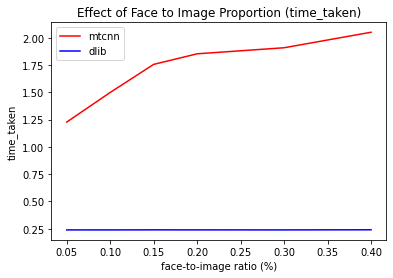

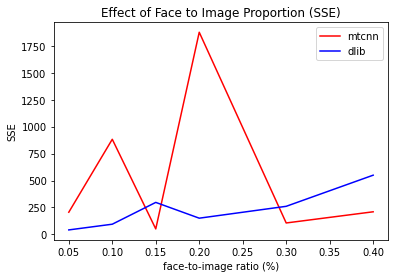

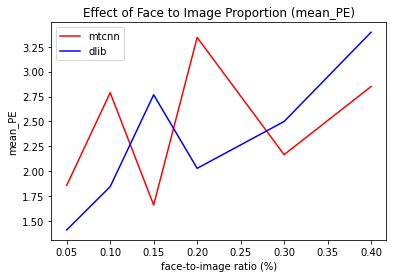

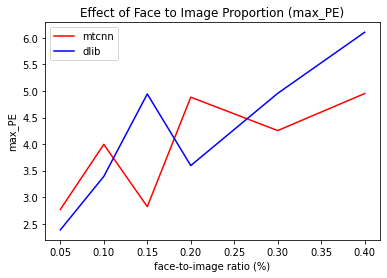

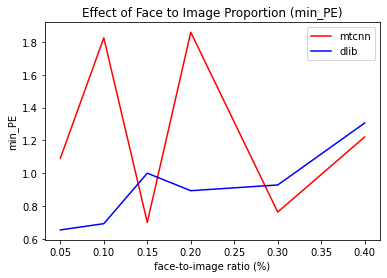

In [423]:
df_new = df

def get_results_landmark(df_new):
    df_results = df_new.groupby(["Algorithm"], as_index=False).mean()
    return df_results


bins = [0, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4]

column, graph_name, y_label = "face_proportion", "Effect of Face to Image Proportion", "face-to-image ratio (%)"
bins = [0, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4]

#column, graph_name, y_label = "face_resolution", "Face Resolution", "face_resolution (mega pixel)"


metrics = ["time_taken", "SSE", "mean_PE", "max_PE","min_PE"]
algorithms = ["mtcnn", "dlib"]
colors = ["red", "blue"]


dfs = []
categories = []
for i in range(len(bins) - 1):
    min_value, max_value = bins[i], bins[i+1]
    df_temp = df_new[(np.bitwise_and( (df_new[column] > min_value ), (df_new[column] <= max_value ) ) ) ] 
    results = get_results_landmark(df_temp).reset_index()
    category = max_value
    results[column] = category
    dfs.append(results)
    categories.append(category)

df_comparison = pd.DataFrame(np.vstack(dfs), columns=results.columns)

for metric in metrics:

    fig, ax = plt.subplots()

    for i in range(len(algorithms)):

        algorithm = algorithms[i]
        color = colors[i]

        df_temp = df_comparison[df_comparison["Algorithm"] == algorithm]
        metric_values = []

        for category in categories: 
            #print(category)
            metric_value = df_temp[df_temp[column] == category][metric]
            metric_values.append(float(metric_value))

        #print(metric_values)
        ax.plot(categories, metric_values, label=algorithm, color=color)
    ax.set_title(f"{graph_name} ({metric})")
    ax.set_xlabel(y_label)
    ax.set_ylabel(metric)
    ax.legend()

    plt.show()

# Face Verification

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy import stats

In [11]:
output_file = "results/results_verification.csv"
df_raw = pd.read_csv(output_file, sep=";")
df_raw["dataset"] = df_raw["dataset"].apply(lambda dataset: dataset.replace("lfw", "LFW").replace("name", "CACD"))
df_raw["dataset"] = df_raw["dataset"].apply(str.upper)
#df_raw.loc[df_raw["dataset"]=="lfw"]["dataset"] = "LFW"
datasets = list(df_raw["dataset"].unique())

algorithms = list(df_raw["algorithm"].unique())
colors = ["orange", "red", "blue", "green", "purple"]
colors_dict = dict(zip(algorithms, colors))

df_raw

,dataset,filepath1,filepath2,correct,same,algorithm,prediction,distance,tolerance,time_taken,size1,person1,age1,gender1,race1,size2,person2,age2,gender2,race2
0,LFW,lfw\Gisele_Bundchen\Gisele_Bundchen_0001.jpg,lfw\Victoria_Beckham\Victoria_Beckham_0001.jpg,True,False,Facenet/OpenFace,False,1.370361,1.00,0.606246,0.189701,Gisele_Bundchen,35,0,1,0.189701,Victoria_Beckham,31,0,1
1,LFW,lfw\Gisele_Bundchen\Gisele_Bundchen_0001.jpg,lfw\Victoria_Beckham\Victoria_Beckham_0001.jpg,True,False,MobileFacenet,False,1.378140,1.25,0.487537,0.189701,Gisele_Bundchen,35,0,1,0.189701,Victoria_Beckham,31,0,1
2,LFW,lfw\Gisele_Bundchen\Gisele_Bundchen_0001.jpg,lfw\Victoria_Beckham\Victoria_Beckham_0001.jpg,True,False,VGG-Face2 (SENET-50),False,227.421750,185.00,0.657988,0.189701,Gisele_Bundchen,35,0,1,0.189701,Victoria_Beckham,31,0,1
3,LFW,lfw\Gisele_Bundchen\Gisele_Bundchen_0001.jpg,lfw\Victoria_Beckham\Victoria_Beckham_0001.jpg,True,False,ArcFace,False,0.791890,0.60,1.604481,0.189701,Gisele_Bundchen,35,0,1,0.189701,Victoria_Beckham,31,0,1
4,LFW,lfw\Gisele_Bundchen\Gisele_Bundchen_0001.jpg,lfw\Victoria_Beckham\Victoria_Beckham_0001.jpg,True,False,CosFace101,False,1.353723,1.24,0.989030,0.189701,Gisele_Bundchen,35,0,1,0.189701,Victoria_Beckham,31,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60598,CACD,CACD2000\37_Sacha_Baron_Cohen_0015.jpg,CACD2000\42_John_Stamos_0002.jpg,True,False,VGG-Face2 (SENET-50),False,202.820310,185.00,0.746117,0.189701,Sacha_Baron_Cohen,37,None,None,0.189701,John_Stamos,42,None,None
60599,CACD,CACD2000\37_Sacha_Baron_Cohen_0015.jpg,CACD2000\42_John_Stamos_0002.jpg,True,False,ArcFace,False,0.691616,0.60,1.786495,0.189701,Sacha_Baron_Cohen,37,None,None,0.189701,John_Stamos,42,None,None
60600,CACD,CACD2000\37_Sacha_Baron_Cohen_0015.jpg,CACD2000\42_John_Stamos_0002.jpg,True,False,CosFace101,False,1.346734,1.24,1.033396,0.189701,Sacha_Baron_Cohen,37,None,None,0.189701,John_Stamos,42,None,None
60601,CACD,CACD2000\52_Tim_Daly_0006.jpg,CACD2000\49_Tim_Daly_0003.jpg,True,True,Facenet/OpenFace,True,0.780239,1.00,0.511033,0.189701,Tim_Daly,52,None,None,0.272964,Tim_Daly,49,None,None


## Select Best Thresholds

In [13]:
def get_raw_metrics(df, threshold = None):
    if(threshold == None):
        threshold = df["tolerance"].iloc[0]
    #print(threshold)
        
    true_positives = df.query(" (distance <= @threshold) & (same == True) ").shape[0]
    true_negatives = df.query(" (distance > @threshold) & (same == False) ").shape[0]
    false_positives = df.query(" (distance <= @threshold) & (same == False) ").shape[0]
    false_negatives = df.query(" (distance > @threshold) & (same == True) ").shape[0]
    accuracy = (true_positives + true_negatives) / df.shape[0]
    
    raw_metrics =  accuracy, true_positives, true_negatives, false_positives, false_negatives
    
    return raw_metrics


def get_best_threshold(df, algorithm, weights = [1, 0, 0], max_fdr = None, m = 5 ):
    
    df_filtered = df.query('algorithm == @algorithm')
    default_threshold = df_filtered["tolerance"].iloc[0]
    multiple_list = range((7*m), (20*m), 1)[::-1]
    thresholds_to_test = [(default_threshold*thresh_multiple/(10*m)) for thresh_multiple in multiple_list]

    scores = []
    for threshold in thresholds_to_test:
        
        metrics = get_raw_metrics(df_filtered, threshold = threshold)
        accuracy, true_positives, true_negatives, false_positives, false_negatives = metrics
        true_positive_rate = true_positives / (true_positives + false_negatives) if ( (true_positives + false_negatives) > 0 ) else 1
        false_positive_rate = false_positives / (false_positives + true_negatives) if ( (false_positives + true_negatives) > 0 ) else 1
        
        fdr_rate = false_positives / (true_positives + false_positives)
        score = ( accuracy * weights[0] ) + ( true_positive_rate * weights[1] ) - ( false_positive_rate * weights[1] )
        scores.append(score)
        
        if(max_fdr != None and fdr_rate <= max_fdr):
            best_threshold = threshold
            return best_threshold
        
    i = np.argmax(scores)
    best_threshold = thresholds_to_test[i]
    
    return best_threshold



for algorithm in algorithms:
    best_threshold = get_best_threshold(df_raw, algorithm)
    inds = np.argwhere(df_raw["algorithm"].values == algorithm).ravel()
    df_raw.loc[inds, "tolerance"] = best_threshold
    print(f"{algorithm} : {best_threshold}")

df_raw["prediction"] = df_raw["distance"] <= df_raw["tolerance"]
df_raw["correct"] = df_raw["prediction"] == df_raw["same"]
df_raw

Facenet/OpenFace : 1.12
MobileFacenet : 1.25
VGG-Face2 (SENET-50) : 181.3
ArcFace : 0.648
CosFace101 : 1.24


,dataset,filepath1,filepath2,correct,same,algorithm,prediction,distance,tolerance,time_taken,size1,person1,age1,gender1,race1,size2,person2,age2,gender2,race2
0,LFW,lfw\Gisele_Bundchen\Gisele_Bundchen_0001.jpg,lfw\Victoria_Beckham\Victoria_Beckham_0001.jpg,True,False,Facenet/OpenFace,False,1.370361,1.120,0.606246,0.189701,Gisele_Bundchen,35,0,1,0.189701,Victoria_Beckham,31,0,1
1,LFW,lfw\Gisele_Bundchen\Gisele_Bundchen_0001.jpg,lfw\Victoria_Beckham\Victoria_Beckham_0001.jpg,True,False,MobileFacenet,False,1.378140,1.250,0.487537,0.189701,Gisele_Bundchen,35,0,1,0.189701,Victoria_Beckham,31,0,1
2,LFW,lfw\Gisele_Bundchen\Gisele_Bundchen_0001.jpg,lfw\Victoria_Beckham\Victoria_Beckham_0001.jpg,True,False,VGG-Face2 (SENET-50),False,227.421750,181.300,0.657988,0.189701,Gisele_Bundchen,35,0,1,0.189701,Victoria_Beckham,31,0,1
3,LFW,lfw\Gisele_Bundchen\Gisele_Bundchen_0001.jpg,lfw\Victoria_Beckham\Victoria_Beckham_0001.jpg,True,False,ArcFace,False,0.791890,0.648,1.604481,0.189701,Gisele_Bundchen,35,0,1,0.189701,Victoria_Beckham,31,0,1
4,LFW,lfw\Gisele_Bundchen\Gisele_Bundchen_0001.jpg,lfw\Victoria_Beckham\Victoria_Beckham_0001.jpg,True,False,CosFace101,False,1.353723,1.240,0.989030,0.189701,Gisele_Bundchen,35,0,1,0.189701,Victoria_Beckham,31,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60598,CACD,CACD2000\37_Sacha_Baron_Cohen_0015.jpg,CACD2000\42_John_Stamos_0002.jpg,True,False,VGG-Face2 (SENET-50),False,202.820310,181.300,0.746117,0.189701,Sacha_Baron_Cohen,37,None,None,0.189701,John_Stamos,42,None,None
60599,CACD,CACD2000\37_Sacha_Baron_Cohen_0015.jpg,CACD2000\42_John_Stamos_0002.jpg,True,False,ArcFace,False,0.691616,0.648,1.786495,0.189701,Sacha_Baron_Cohen,37,None,None,0.189701,John_Stamos,42,None,None
60600,CACD,CACD2000\37_Sacha_Baron_Cohen_0015.jpg,CACD2000\42_John_Stamos_0002.jpg,True,False,CosFace101,False,1.346734,1.240,1.033396,0.189701,Sacha_Baron_Cohen,37,None,None,0.189701,John_Stamos,42,None,None
60601,CACD,CACD2000\52_Tim_Daly_0006.jpg,CACD2000\49_Tim_Daly_0003.jpg,True,True,Facenet/OpenFace,True,0.780239,1.120,0.511033,0.189701,Tim_Daly,52,None,None,0.272964,Tim_Daly,49,None,None


In [12]:
x = np.array([["Facenet" , "1.12"],
["MobileFacenet", "1.25"],
["VGG-Face2" , "181.3"],
["ArcFace" , "0.648"],
["CosFace", "1.24"]])

pd.DataFrame(x, columns = ["Algorithm", "Threshold"])

,Algorithm,Threshold
0,Facenet,1.12
1,MobileFacenet,1.25
2,VGG-Face2,181.3
3,ArcFace,0.648
4,CosFace,1.24


## Initial Results

In [14]:
def calculate_accuracy_metrics(df, algorithm, dataset):

    #print(dataset, algorithm)
    df_temp = df.query(f'dataset == "{dataset}" & algorithm == "{algorithm}" ')
    n_rows = df_temp.count().iloc[0]
    
    if(n_rows == 0):
        return n_rows, None, None, None, None, None, None, None
    
    accuracy, true_positives, true_negatives, false_positives, false_negatives = get_raw_metrics(df_temp)
    
    precision = (true_positives) / (true_positives + false_positives)
    recall = (true_positives) / (true_positives + false_negatives)
    
    return n_rows, true_positives, true_negatives, false_positives, false_negatives, precision, recall
    
    
def add_metrics(row, df):
    
    dataset, algorithm = row.name
    n_rows, true_positives, true_negatives, false_positives, false_negatives, precision, recall = calculate_accuracy_metrics(df, algorithm, dataset)
    
    row["precision"] = precision
    row["recall"] = recall
    
    row["n_rows"] = n_rows
    row["true_positives"] = true_positives
    row["false_positives"] = false_positives
    row["true_negatives"] = true_negatives
    row["false_negatives"] = false_negatives
    
    row["TP_rate"] = true_positives / (true_positives + false_negatives)
    row["FP_rate"]  = false_positives / (false_positives + true_negatives)
        
    
    return row

    

results = df_raw.groupby(["dataset", "algorithm"]).mean()
time_taken = results["time_taken"]
results = results[ ["correct", "time_taken"]]
results.columns = ["accuracy", "time (s)"]
results = results.sort_values(by="dataset", ascending=False)
results = results.apply(lambda row: add_metrics(row, df_raw), axis=1)

integer_columns = ["n_rows", "true_positives", "false_positives", "true_negatives", "false_negatives"]
results[integer_columns ] = results[integer_columns ].astype(int)

float_columns = ["accuracy", "precision", "recall", "time (s)", "TP_rate", "FP_rate"]
results[float_columns] = results[float_columns].round(3)

#true_negatives_rate
ordered_columns = ["accuracy", "precision", "recall", "FP_rate",  "n_rows", "true_positives", "false_positives", "true_negatives", "false_negatives", "time (s)"]
results[ordered_columns]

accuracy  precision  recall  FP_rate  n_rows  \
dataset algorithm                                                            
LFW     ArcFace                  0.977      0.974   0.981    0.027    6214   
        CosFace101               0.965      0.977   0.954    0.023    6213   
        Facenet/OpenFace         0.978      0.979   0.979    0.022    6214   
        MobileFacenet            0.964      0.978   0.952    0.023    6214   
        VGG-Face2 (SENET-50)     0.974      0.987   0.961    0.013    6214   
CACD    ArcFace                  0.887      0.985   0.787    0.012    5906   
        CosFace101               0.855      0.941   0.757    0.047    5905   
        Facenet/OpenFace         0.880      0.981   0.775    0.015    5908   
        MobileFacenet            0.846      0.922   0.757    0.064    5908   
        VGG-Face2 (SENET-50)     0.870      0.964   0.769    0.029    5907   

                              true_positives  false_positives  true_negatives  \
dataset algorithm                                                               
LFW     ArcFace                         3105               82            2966   
        CosFace101                      3018               71            2977   
        Facenet/OpenFace                3098               66            2982   
        MobileFacenet                   3014               69            2979   
        VGG-Face2 (SENET-50)            3042               39            3009   
CACD    ArcFace                         2321               36            2919   
        CosFace101                      2234              140            2814   
        Facenet/OpenFace                2289               45            2910   
        MobileFacenet                   2234              190            2765   
        VGG-Face2 (SENET-50)            2271               85            2870   

                              false_negatives  time (s)  
dataset algorithm                                        
LFW     ArcFace                            61     1.594  
        CosFace101                        147     0.973  
        Facenet/OpenFace                   68     0.599  
        MobileFacenet                     152     0.510  
        VGG-Face2 (SENET-50)              124     0.667  
CACD    ArcFace                           630     1.593  
        CosFace101                        717     0.971  
        Facenet/OpenFace                  664     0.597  
        MobileFacenet                     719     0.492  
        VGG-Face2 (SENET-50)              681     0.668

In [15]:
temp = df_raw.query('dataset == "LFW" & algorithm == "MobileFacenet" & same == False')
temp

,dataset,filepath1,filepath2,correct,same,algorithm,prediction,distance,tolerance,time_taken,size1,person1,age1,gender1,race1,size2,person2,age2,gender2,race2
1,LFW,lfw\Gisele_Bundchen\Gisele_Bundchen_0001.jpg,lfw\Victoria_Beckham\Victoria_Beckham_0001.jpg,True,False,MobileFacenet,False,1.378140,1.25,0.487537,0.189701,Gisele_Bundchen,35,0,1,0.189701,Victoria_Beckham,31,0,1
6,LFW,lfw\Abid_Hamid_Mahmud_Al-Tikriti\Abid_Hamid_Ma...,lfw\Serena_Williams\Serena_Williams_0024.jpg,True,False,MobileFacenet,False,1.380856,1.25,0.515486,0.131973,Abid_Hamid_Mahmud_Al-Tikriti,46,1,1,0.189701,Serena_Williams,24,0,0
21,LFW,lfw\Lindsey_Graham\Lindsey_Graham_0001.jpg,lfw\Oprah_Winfrey\Oprah_Winfrey_0001.jpg,True,False,MobileFacenet,False,1.382100,1.25,0.490094,0.189701,Lindsey_Graham,44,1,1,0.189701,Oprah_Winfrey,48,0,0
26,LFW,lfw\Edward_Kennedy\Edward_Kennedy_0001.jpg,lfw\Vicente_Fernandez\Vicente_Fernandez_0004.jpg,True,False,MobileFacenet,False,1.356881,1.25,0.484402,0.189701,Edward_Kennedy,64,1,1,0.131973,Vicente_Fernandez,47,1,1
36,LFW,lfw\Pierce_Brosnan\Pierce_Brosnan_0008.jpg,lfw\Sheila_Fraser\Sheila_Fraser_0002.jpg,True,False,MobileFacenet,False,1.377179,1.25,0.481677,0.189701,Pierce_Brosnan,55,1,1,0.131973,Sheila_Fraser,61,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60464,LFW,lfw\Cate_Blanchett\Cate_Blanchett_0003.jpg,lfw\Sally_Ride\Sally_Ride_0002.jpg,True,False,MobileFacenet,False,1.352272,1.25,0.509616,0.189701,Cate_Blanchett,39,0,1,0.189701,Sally_Ride,52,0,1
60504,LFW,lfw\Carlos_Ghosn\Carlos_Ghosn_0002.jpg,lfw\Spencer_Abraham\Spencer_Abraham_0011.jpg,True,False,MobileFacenet,False,1.260353,1.25,0.492802,0.189701,Carlos_Ghosn,65,1,1,0.189701,Spencer_Abraham,54,1,1
60514,LFW,lfw\Wesley_Clark\Wesley_Clark_0002.jpg,lfw\Lindsay_Davenport\Lindsay_Davenport_0016.jpg,True,False,MobileFacenet,False,1.368914,1.25,0.487300,0.131973,Wesley_Clark,64,1,1,0.131973,Lindsay_Davenport,29,0,1
60519,LFW,lfw\Federico_Trillo\Federico_Trillo_0003.jpg,lfw\Spencer_Abraham\Spencer_Abraham_0005.jpg,True,False,MobileFacenet,False,1.345570,1.25,0.493824,0.131973,Federico_Trillo,42,1,1,0.189701,Spencer_Abraham,57,1,1


## ROC curves

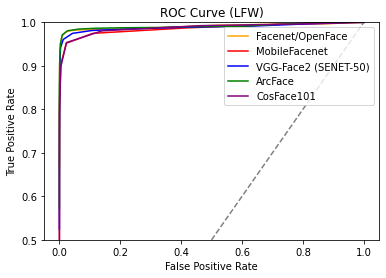

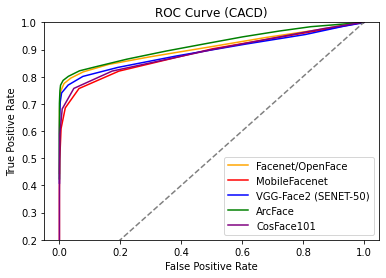

In [16]:
def calculate_roc_curve(df, algorithm, dataset, m=2):
    
    df_filtered = df_raw.query('dataset == @dataset & algorithm == @algorithm')
    default_threshold = df_filtered["tolerance"].iloc[0]
    multiple_list = range((7*m), (20*m), 1)
    thresholds_to_test = [(default_threshold*thresh_multiple/(10*m)) for thresh_multiple in multiple_list]

    true_positives_list, false_positives_list = [], []
    for threshold in thresholds_to_test:
        metrics = get_raw_metrics(df_filtered, threshold = threshold)
        #print(threshold,": ", metrics)
        accuracy, true_positives, true_negatives, false_positives, false_negatives = metrics
        true_positive_rate = true_positives / (true_positives + false_negatives) if ( (true_positives + false_negatives) > 0 ) else 1
        false_positive_rate = false_positives / (false_positives + true_negatives) if ( (false_positives + true_negatives) > 0 ) else 1

        true_positives_list.append(true_positive_rate)
        false_positives_list.append(false_positive_rate)

    
    return true_positives_list, false_positives_list


for dataset in datasets:
    
    fig, ax = plt.subplots()
    
    for algorithm in algorithms:
        
        true_positives_list, false_positives_list = calculate_roc_curve(df_raw, algorithm, dataset)
        # print(true_positives_list)
        # print(false_positives_list)
        ax.plot(false_positives_list, true_positives_list, label=algorithm, color=colors_dict[algorithm])
        ax.set_title(f"ROC Curve ({dataset})")
        ax.set_xlabel("False Positive Rate")
        ax.set_ylabel("True Positive Rate")
    
    ax.plot([0, 1], [0, 1], '--', color="grey")
    ax.legend()
    if(dataset == "CACD"):
        plt.ylim([0.2, 1.0])
    else:
        plt.ylim([0.5, 1.0])
    plt.show()

    

## Impact of face size

In [17]:
df_size = df_raw.query('dataset == "CACD"')

In [18]:
np.percentile(df_size["size1"], range(0,101,10))

array([0.04367447, 0.18970108, 0.18970108, 0.18970108, 0.18970108,
       0.18970108, 0.18970108, 0.18970108, 0.18970108, 0.27296448,
       0.5654335 ])

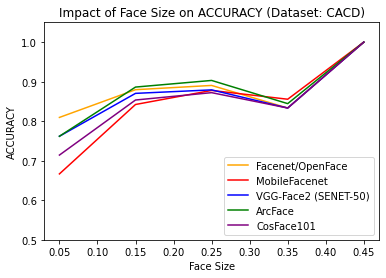

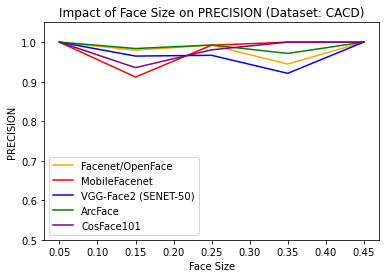

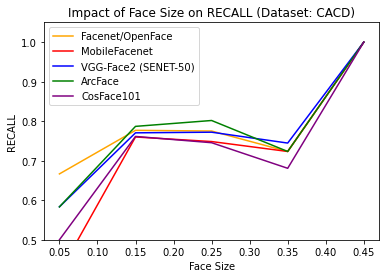

In [19]:
sizes = [0, 0.1, 0.2, 0.3, 0.4, 0.5]

data = [ [[], [], [], []] for _ in range(len(algorithms)) ]
x_values = []

for i in range(len(sizes)-1):
    
    min_size, max_size = sizes[i:i+2]
    df_size_alg = df_size.query(" size1 >= @min_size & size1 < @max_size ")
    
    for j in range(len(algorithms)):
        
        algorithm = algorithms[j]
        df_temp = df_size_alg.query(" algorithm == @algorithm ")
        #print(df_temp)
        if(df_temp.shape[0] == 0):
            continue
            
        accuracy, true_positives, true_negatives, false_positives, false_negatives = get_raw_metrics(df_temp)
        precision = (true_positives) / (true_positives + false_positives) if ( (true_positives + false_positives) > 0 ) else 1
        recall = (true_positives) / (true_positives + false_negatives) if ( (true_positives + false_negatives) > 0 ) else 1
        
        data[j][0].append(accuracy)
        data[j][1].append(precision)
        data[j][2].append(recall)
        #print(min_size, max_size)
        data[j][3].append(( min_size + max_size) / 2 )

metrics = ["accuracy", "precision", "recall"]
for i in range(3): 
    fig, ax = plt.subplots()
    for j in range(len(algorithms)):
        algorithm = algorithms[j]
        metric_values = data[j][i]
        x_values = data[j][3]
        #print(x_values)
        #print(metric_values)
        #print()
        ax.plot(x_values, metric_values, label=algorithm, color=colors_dict[algorithm])
        
        ax.set_title(f"Impact of Face Size on {metrics[i].upper()} (Dataset: CACD)")
        ax.set_xlabel(f"Face Size")
        ax.set_ylabel(f"{metrics[i].upper()}")
    
    ax.legend()
    plt.ylim([0.5, 1.05])
    plt.show()

## Impact of Age

In [20]:
df_cacd = df_raw[df_raw["dataset"] == "CACD"]

df_cacd = df_raw[df_raw["dataset"] == "CACD"]
df_cacd["age_difference"] = (df_cacd["age1"] - df_cacd["age2"]).abs()
#df_cacd["age_difference"] = df_cacd["age_difference"].abs()
df_cacd

<ipython-input-20-84956d0ffbba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cacd["age_difference"] = (df_cacd["age1"] - df_cacd["age2"]).abs()


,dataset,filepath1,filepath2,correct,same,algorithm,prediction,distance,tolerance,time_taken,...,person1,age1,gender1,race1,size2,person2,age2,gender2,race2,age_difference
470,CACD,CACD2000\47_John_Stamos_0014.jpg,CACD2000\48_John_Stamos_0008.jpg,True,True,Facenet/OpenFace,True,0.503336,1.120,0.546002,...,John_Stamos,47,None,None,0.189701,John_Stamos,48,None,None,1
471,CACD,CACD2000\47_John_Stamos_0014.jpg,CACD2000\48_John_Stamos_0008.jpg,True,True,MobileFacenet,True,0.538928,1.250,0.484406,...,John_Stamos,47,None,None,0.189701,John_Stamos,48,None,None,1
472,CACD,CACD2000\47_John_Stamos_0014.jpg,CACD2000\48_John_Stamos_0008.jpg,True,True,VGG-Face2 (SENET-50),True,76.478690,181.300,0.659524,...,John_Stamos,47,None,None,0.189701,John_Stamos,48,None,None,1
473,CACD,CACD2000\47_John_Stamos_0014.jpg,CACD2000\48_John_Stamos_0008.jpg,True,True,ArcFace,True,0.286786,0.648,1.598896,...,John_Stamos,47,None,None,0.189701,John_Stamos,48,None,None,1
474,CACD,CACD2000\47_John_Stamos_0014.jpg,CACD2000\48_John_Stamos_0008.jpg,True,True,CosFace101,True,0.751372,1.240,0.968805,...,John_Stamos,47,None,None,0.189701,John_Stamos,48,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60598,CACD,CACD2000\37_Sacha_Baron_Cohen_0015.jpg,CACD2000\42_John_Stamos_0002.jpg,True,False,VGG-Face2 (SENET-50),False,202.820310,181.300,0.746117,...,Sacha_Baron_Cohen,37,None,None,0.189701,John_Stamos,42,None,None,5
60599,CACD,CACD2000\37_Sacha_Baron_Cohen_0015.jpg,CACD2000\42_John_Stamos_0002.jpg,True,False,ArcFace,False,0.691616,0.648,1.786495,...,Sacha_Baron_Cohen,37,None,None,0.189701,John_Stamos,42,None,None,5
60600,CACD,CACD2000\37_Sacha_Baron_Cohen_0015.jpg,CACD2000\42_John_Stamos_0002.jpg,True,False,CosFace101,False,1.346734,1.240,1.033396,...,Sacha_Baron_Cohen,37,None,None,0.189701,John_Stamos,42,None,None,5
60601,CACD,CACD2000\52_Tim_Daly_0006.jpg,CACD2000\49_Tim_Daly_0003.jpg,True,True,Facenet/OpenFace,True,0.780239,1.120,0.511033,...,Tim_Daly,52,None,None,0.272964,Tim_Daly,49,None,None,3


In [21]:
df_cacd[["age1", "age2", "age_difference"]].describe()

,age1,age2,age_difference
count,29534.000000,29534.000000,29534.000000
mean,38.461367,38.463127,8.632424
std,12.031794,11.962318,9.013854
min,14.000000,14.000000,0.000000
25%,28.000000,29.000000,2.000000
50%,38.000000,38.000000,5.000000
75%,49.000000,48.000000,12.000000
max,62.000000,62.000000,46.000000


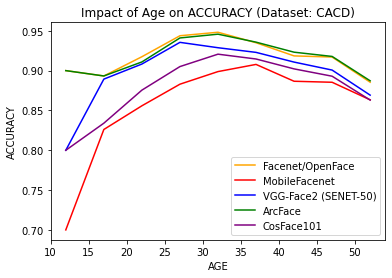

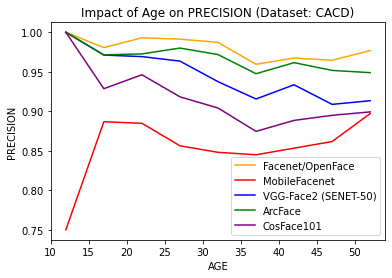

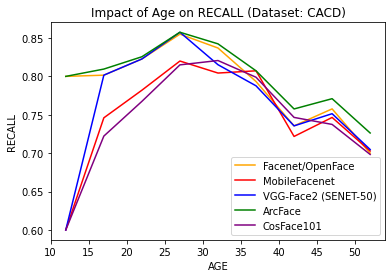

In [22]:
ages = [i for i in range(0, 60, 5)]

data = [ [[], [], [], []] for _ in range(len(algorithms)) ]
x_values = []

for i in range(len(ages)-1):
    
    min_age, max_age = ages[i:i+2]
    df_age = df_cacd.query(" age1 >= @min_age & age2 < @max_age ")
    
    for j in range(len(algorithms)):
        
        algorithm = algorithms[j]
        df_temp = df_age.query(" algorithm == @algorithm ")
        
        if(df_temp.shape[0] == 0):
            continue
            
        accuracy, true_positives, true_negatives, false_positives, false_negatives = get_raw_metrics(df_temp)
        precision = (true_positives) / (true_positives + false_positives) if ( (true_positives + false_positives) > 0 ) else 1
        recall = (true_positives) / (true_positives + false_negatives) if ( (true_positives + false_negatives) > 0 ) else 1
        
        data[j][0].append(accuracy)
        data[j][1].append(precision)
        data[j][2].append(recall)
        data[j][3].append(int( (min_age + max_age)/2 ) )

metrics = ["accuracy", "precision", "recall"]
for i in range(3): 
    fig, ax = plt.subplots()
    for j in range(len(algorithms)):
        algorithm = algorithms[j]
        metric_values = data[j][i]
        x_values = data[j][3]
        ax.plot(x_values, metric_values, label=algorithm, color=colors_dict[algorithm])
        
        ax.set_title(f"Impact of Age on {metrics[i].upper()} (Dataset: CACD)")
        ax.set_xlabel(f"AGE")
        ax.set_ylabel(f"{metrics[i].upper()}")
    
    ax.legend()
    plt.show()

## Impact of Age Difference

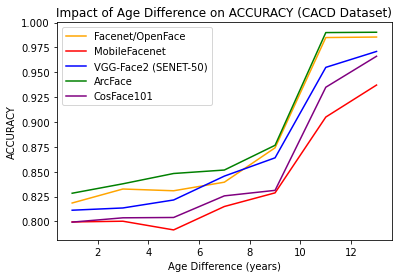

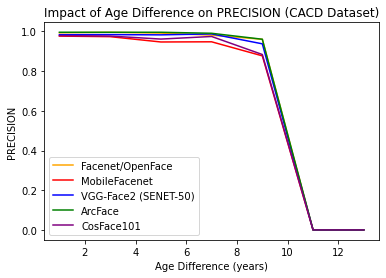

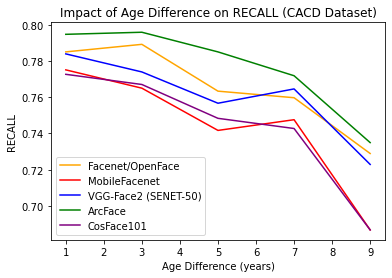

In [23]:
age_diffs = [i for i in range(0, 15, 2)]

for same_person, title_category in [(None, "CACD Dataset")]:
                                    #(None, "Same Person"),
                                    #(None, "Different Person")]:

    data_agediff = [ [[], [], [], []] for _ in range(len(algorithms)) ]
    x_values = []

    for i in range(len(age_diffs)-1):

        min_diff, max_diff = age_diffs[i:i+2]
        
        if(same_person is None):
            df_agediff = df_cacd.query(" age_difference >= @min_diff & age_difference < @max_diff")
        else:
            df_agediff = df_cacd.query(" age_difference >= @min_diff & age_difference < @max_diff & same == @same_person ")

        for j in range(len(algorithms)):

            algorithm = algorithms[j]
            df_temp = df_agediff.query(" algorithm == @algorithm ")

            if(df_temp.shape[0] == 0):
                continue

            accuracy, true_positives, true_negatives, false_positives, false_negatives = get_raw_metrics(df_temp)
            fpr = false_positives / (true_positives + false_positives )  if ( (true_positives + false_positives )   > 0 ) else None
            fnr = false_negatives / (true_negatives + false_negatives )  if ( (true_negatives + false_negatives )  > 0 ) else None
            precision = (true_positives) / (true_positives + false_positives) if ( (true_positives + false_positives)  > 0 ) else None
            recall = (true_positives) / (true_positives + false_negatives) if ( (true_positives + false_negatives)  > 0 ) else None

            data_agediff[j][0].append(accuracy)
            data_agediff[j][1].append(precision)
            data_agediff[j][2].append(recall)
            data_agediff[j][3].append(int( (min_diff + max_diff)/2 ) )

    metrics = ["accuracy", "precision", "recall"]
    #metrics = ["Accuracy", "False Positive Rate", "False Negative Rate"]
    for i in range(3): 
        fig, ax = plt.subplots()
        for j in range(len(algorithms)):
            algorithm = algorithms[j]
            metric_values = data_agediff[j][i]
            x_values = data_agediff[j][3]
            ax.plot(x_values, metric_values, label=algorithm, color=colors_dict[algorithm])
            
            ax.set_title(f"Impact of Age Difference on {metrics[i].upper()} ({title_category})")
            ax.set_xlabel(f"Age Difference (years)")
            ax.set_ylabel(f"{metrics[i].upper()}")

        ax.legend()
        plt.show()

## Performance of different gender

In [24]:
df_lfw = df_raw.query(" dataset == 'LFW' ")
df_lfw

,dataset,filepath1,filepath2,correct,same,algorithm,prediction,distance,tolerance,time_taken,size1,person1,age1,gender1,race1,size2,person2,age2,gender2,race2
0,LFW,lfw\Gisele_Bundchen\Gisele_Bundchen_0001.jpg,lfw\Victoria_Beckham\Victoria_Beckham_0001.jpg,True,False,Facenet/OpenFace,False,1.370361,1.120,0.606246,0.189701,Gisele_Bundchen,35,0,1,0.189701,Victoria_Beckham,31,0,1
1,LFW,lfw\Gisele_Bundchen\Gisele_Bundchen_0001.jpg,lfw\Victoria_Beckham\Victoria_Beckham_0001.jpg,True,False,MobileFacenet,False,1.378140,1.250,0.487537,0.189701,Gisele_Bundchen,35,0,1,0.189701,Victoria_Beckham,31,0,1
2,LFW,lfw\Gisele_Bundchen\Gisele_Bundchen_0001.jpg,lfw\Victoria_Beckham\Victoria_Beckham_0001.jpg,True,False,VGG-Face2 (SENET-50),False,227.421750,181.300,0.657988,0.189701,Gisele_Bundchen,35,0,1,0.189701,Victoria_Beckham,31,0,1
3,LFW,lfw\Gisele_Bundchen\Gisele_Bundchen_0001.jpg,lfw\Victoria_Beckham\Victoria_Beckham_0001.jpg,True,False,ArcFace,False,0.791890,0.648,1.604481,0.189701,Gisele_Bundchen,35,0,1,0.189701,Victoria_Beckham,31,0,1
4,LFW,lfw\Gisele_Bundchen\Gisele_Bundchen_0001.jpg,lfw\Victoria_Beckham\Victoria_Beckham_0001.jpg,True,False,CosFace101,False,1.353723,1.240,0.989030,0.189701,Gisele_Bundchen,35,0,1,0.189701,Victoria_Beckham,31,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60528,LFW,lfw\Henrique_Meirelles\Henrique_Meirelles_0002...,lfw\Henrique_Meirelles\Henrique_Meirelles_0001...,True,True,Facenet/OpenFace,True,0.700863,1.120,0.483055,0.189701,Henrique_Meirelles,58,1,1,0.189701,Henrique_Meirelles,57,1,1
60529,LFW,lfw\Henrique_Meirelles\Henrique_Meirelles_0002...,lfw\Henrique_Meirelles\Henrique_Meirelles_0001...,True,True,MobileFacenet,True,0.884157,1.250,0.502931,0.189701,Henrique_Meirelles,58,1,1,0.189701,Henrique_Meirelles,57,1,1
60530,LFW,lfw\Henrique_Meirelles\Henrique_Meirelles_0002...,lfw\Henrique_Meirelles\Henrique_Meirelles_0001...,True,True,VGG-Face2 (SENET-50),True,117.731500,181.300,0.652441,0.189701,Henrique_Meirelles,58,1,1,0.189701,Henrique_Meirelles,57,1,1
60531,LFW,lfw\Henrique_Meirelles\Henrique_Meirelles_0002...,lfw\Henrique_Meirelles\Henrique_Meirelles_0001...,True,True,ArcFace,True,0.498264,0.648,1.580675,0.189701,Henrique_Meirelles,58,1,1,0.189701,Henrique_Meirelles,57,1,1


22659 8410 6065
[0.97466769 0.96373365]


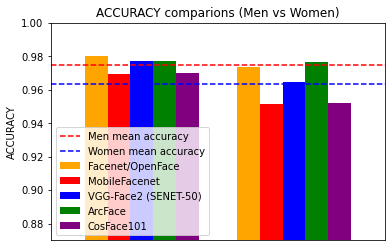

[0.97780942 0.98263415]


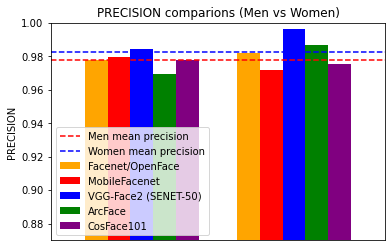

[0.97232981 0.94581395]


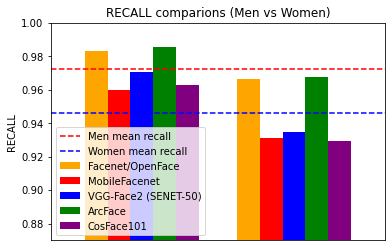

In [25]:
df_men = df_lfw.query("gender1 == '1'")
df_women = df_lfw.query("gender1 == '0'")
df_different = df_lfw.query("gender1 != gender2")
dfs = [df_men, df_women, df_different, df_lfw]

print(df_men.shape[0], df_women.shape[0], df_different.shape[0])
data_gender = [ [ [  ] for _ in range(len(dfs))] for _ in range(3)]



for i in range(len(dfs)):
    
    df_gender_temp = dfs[i]
    for j in range(len(algorithms)):
        
        algorithm = algorithms[j]
        df_temp = df_gender_temp.query(" algorithm == @algorithm ")
        accuracy, true_positives, true_negatives, false_positives, false_negatives = get_raw_metrics(df_temp)
        fpr = false_positives / (true_positives + false_positives )  if ( (true_positives + false_positives )   > 0 ) else None
        fnr = false_negatives / (true_negatives + false_negatives )  if ( (true_negatives + false_negatives )  > 0 ) else None
        precision = (true_positives) / (true_positives + false_positives) if ( (true_positives + false_positives)  > 0 ) else None
        recall = (true_positives) / (true_positives + false_negatives) if ( (true_positives + false_negatives)  > 0 ) else 0

        data_gender[0][i].append(accuracy)
        data_gender[1][i].append(precision)
        data_gender[2][i].append(recall)
        
data_gender = np.array(data_gender)
        
metrics = ["accuracy", "precision", "recall"]

dataset_name = ["Men", "Women"]#, "Men/Women"]

df_colors = ["red", "blue"]

for metric_i in range(len(metrics)):
    
    metric = metrics[metric_i].upper()
    x = np.array([0.1*it for it in range(len(dataset_name))])
    ax = plt.subplot(111)
    lag = 0
    
    mean_metrics = np.mean(data_gender[metric_i, :len(dataset_name), :], axis=1)
    
    #np.mean(data_gender[0, :len(dataset_name), :], axis=1)

    
    for alg_i in range(len(algorithms)):
        algorithm = algorithms[alg_i]
        #mean_stat = np.mean(data_gender[metric_i][df_i])
        
        y = data_gender[metric_i, :len(dataset_name), alg_i]
        x = np.array([it for it in range(len(dataset_name))])
        #print(y, x)
        
        ax.bar(x+lag, y, width=0.15, color=colors_dict[algorithm], label = algorithm, align='center')
        lag += 0.15
        #ax.xaxis_date()
    
    print(mean_metrics)
    for df_i in range(len(dataset_name)):
        ax.plot([-0.4, 2], [mean_metrics[df_i], mean_metrics[df_i]], '--', color=df_colors[df_i], label = f"{dataset_name[df_i]} mean {metrics[metric_i]}")
    
    ax.legend(loc='lower left')
    ax.axes.xaxis.set_visible(False)
    ax.set_title(f"{metric} comparions (Men vs Women)")
    ax.set_xlabel(f"ok")
    ax.set_ylabel(f"{metric}")
            
    plt.ylim(0.87, 1)
    plt.xlim(-0.3, 1.9)
    plt.show()

In [26]:
mean_metrics[metric_i]

IndexError: index 2 is out of bounds for axis 0 with size 2

In [27]:
test = stats.ttest_ind(df_men["correct"].values, df_women["correct"].values)

In [30]:
test

Ttest_indResult(statistic=5.166752047587922, pvalue=2.3966747248871976e-07)

## Comparsion of Perfomacne on Ethnicity

26379 4690 3905
[0.97221251 0.96886994]


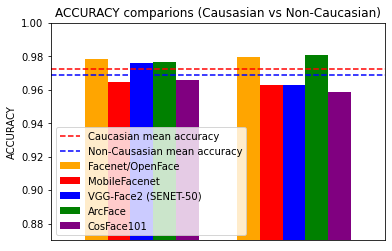

[0.97862607 0.98175308]


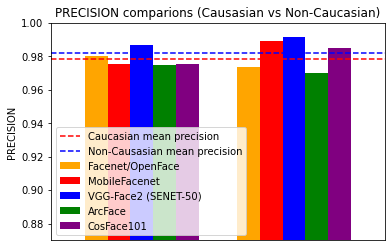

[0.96641471 0.95802469]


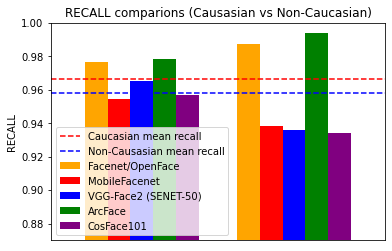

In [31]:
df_white = df_lfw.query("race1 == '1'")
df_nonwhite = df_lfw.query("race1 == '0'")
df_different = df_lfw.query("race1 != race2")
dfs = [df_white, df_nonwhite, df_different, df_lfw]

print(df_white.shape[0], df_nonwhite.shape[0], df_different.shape[0])
data_race = [ [ [  ] for _ in range(len(dfs))] for _ in range(3)]



for i in range(len(dfs)):
    
    df_race_temp = dfs[i]
    for j in range(len(algorithms)):
        
        algorithm = algorithms[j]
        df_temp = df_race_temp.query(" algorithm == @algorithm ")
        accuracy, true_positives, true_negatives, false_positives, false_negatives = get_raw_metrics(df_temp)
        fpr = false_positives / (true_positives + false_positives )  if ( (true_positives + false_positives )   > 0 ) else None
        fnr = false_negatives / (true_negatives + false_negatives )  if ( (true_negatives + false_negatives )  > 0 ) else None
        precision = (true_positives) / (true_positives + false_positives) if ( (true_positives + false_positives)  > 0 ) else None
        recall = (true_positives) / (true_positives + false_negatives) if ( (true_positives + false_negatives)  > 0 ) else 0

        data_race[0][i].append(accuracy)
        data_race[1][i].append(precision)
        data_race[2][i].append(recall)
        
data_race = np.array(data_race)
        
metrics = ["accuracy", "precision", "recall"]

dataset_name = ["Caucasian", "Non-Causasian"]#, "Men/Women"]

df_colors = ["red", "blue"]

for metric_i in range(len(metrics)):
    
    metric = metrics[metric_i].upper()
    x = np.array([0.1*it for it in range(len(dataset_name))])
    ax = plt.subplot(111)
    lag = 0
    
    mean_metrics = np.mean(data_race[metric_i, :len(dataset_name), :], axis=1)
    
    #np.mean(data_gender[0, :len(dataset_name), :], axis=1)

    
    for alg_i in range(len(algorithms)):
        algorithm = algorithms[alg_i]
        #mean_stat = np.mean(data_race[metric_i][df_i])
        
        y = data_race[metric_i, :len(dataset_name), alg_i]
        x = np.array([it for it in range(len(dataset_name))])
        #print(y, x)
        
        ax.bar(x+lag, y, width=0.15, color=colors_dict[algorithm], label = algorithm, align='center')
        lag += 0.15
        #ax.xaxis_date()
    
    print(mean_metrics)
    for df_i in range(len(dataset_name)):
        ax.plot([-0.4, 2], [mean_metrics[df_i], mean_metrics[df_i]], '--', color=df_colors[df_i], label = f"{dataset_name[df_i]} mean {metrics[metric_i]}")
    
    ax.legend(loc='lower left')
    ax.axes.xaxis.set_visible(False)
    ax.set_title(f"{metric} comparions (Causasian vs Non-Caucasian)")
    ax.set_xlabel(f"ok")
    ax.set_ylabel(f"{metric}")
            
    plt.ylim(0.87, 1.0)
    plt.xlim(-0.3, 1.9)
    plt.show()

In [33]:
stats.ttest_ind(df_white["correct"].values, df_nonwhite["correct"].values)

Ttest_indResult(statistic=1.2722197089532938, pvalue=0.20330458903768345)

## 99.9% True Positive Rate 

In [36]:
print("Thresholds for 99.9% True Verification Rate\n")

df_test = deepcopy(df_raw)

for algorithm in algorithms:
    best_threshold = get_best_threshold(df_test, algorithm, max_fdr = 1/1000)
    inds = np.argwhere(df_test["algorithm"].values == algorithm).ravel()
    df_test.loc[inds, "tolerance"] = best_threshold
    print(f"{algorithm} : {round(best_threshold, 3)}")

df_test["prediction"] = df_test["distance"] <= df_test["tolerance"]
df_test["correct"] = df_test["prediction"] == df_test["same"]



results = df_test.groupby(["dataset", "algorithm"]).mean()
time_taken = results["time_taken"]
results = results[ ["correct", "time_taken"]]
results.columns = ["accuracy", "time (s)"]
results = results.sort_values(by="dataset", ascending=False)
results = results.apply(lambda row: add_metrics(row, df_test), axis=1)

integer_columns = ["n_rows", "true_positives", "false_positives", "true_negatives", "false_negatives"]
results[integer_columns ] = results[integer_columns ].astype(int)

float_columns = ["accuracy", "precision", "recall", "time (s)", "TP_rate", "FP_rate"]
results[float_columns] = results[float_columns].round(3)

ordered_columns = ["accuracy", "precision", "recall", "FP_rate",  "n_rows", "true_positives", "false_positives", "true_negatives", "false_negatives", "time (s)"]
results[ordered_columns]

Thresholds for 99.9% True Verification Rate

Facenet/OpenFace : 0.941
MobileFacenet : 1.075
VGG-Face2 (SENET-50) : 152.292
ArcFace : 0.557
CosFace101 : 1.091


accuracy  precision  recall  FP_rate  n_rows  \
dataset algorithm                                                            
LFW     ArcFace                  0.956      0.999   0.914    0.001    6214   
        CosFace101               0.860      1.000   0.726    0.000    6213   
        Facenet/OpenFace         0.946      0.999   0.895    0.001    6214   
        MobileFacenet            0.859      1.000   0.722    0.000    6214   
        VGG-Face2 (SENET-50)     0.913      1.000   0.829    0.000    6214   
CACD    ArcFace                  0.857      1.000   0.713    0.000    5906   
        CosFace101               0.772      0.999   0.544    0.000    5905   
        Facenet/OpenFace         0.832      1.000   0.664    0.000    5908   
        MobileFacenet            0.757      0.998   0.514    0.001    5908   
        VGG-Face2 (SENET-50)     0.822      0.999   0.644    0.000    5907   

                              true_positives  false_positives  true_negatives  \
dataset algorithm                                                               
LFW     ArcFace                         2893                3            3045   
        CosFace101                      2297                0            3048   
        Facenet/OpenFace                2832                2            3046   
        MobileFacenet                   2287                0            3048   
        VGG-Face2 (SENET-50)            2625                1            3047   
CACD    ArcFace                         2105                0            2955   
        CosFace101                      1605                1            2953   
        Facenet/OpenFace                1960                0            2955   
        MobileFacenet                   1519                3            2952   
        VGG-Face2 (SENET-50)            1900                1            2954   

                              false_negatives  time (s)  
dataset algorithm                                        
LFW     ArcFace                           273     1.594  
        CosFace101                        868     0.973  
        Facenet/OpenFace                  334     0.599  
        MobileFacenet                     879     0.510  
        VGG-Face2 (SENET-50)              541     0.667  
CACD    ArcFace                           846     1.593  
        CosFace101                       1346     0.971  
        Facenet/OpenFace                  993     0.597  
        MobileFacenet                    1434     0.492  
        VGG-Face2 (SENET-50)             1052     0.668

In [38]:
x = np.array([["Facenet" , "0.941"],
["MobileFacenet", "1.075"],
["VGG-Face2" , "152.2"],
["ArcFace" , "0.557"],
["CosFace", "1.091"]])

pd.DataFrame(x, columns = ["Algorithm", "99.9% Precision Threshold"])

,Algorithm,99.9% Precision Threshold
0,Facenet,0.941
1,MobileFacenet,1.075
2,VGG-Face2,152.2
3,ArcFace,0.557
4,CosFace,1.091


# Face Recognition

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [130]:
recog_output_file = "results/results_recognition.csv"
df_recog_orig = pd.read_csv(recog_output_file, sep=";")
df_recog_orig["dataset"] = df_recog_orig["dataset"].apply(lambda dataset: dataset.replace("lfw", "LFW").replace("name", "CACD").upper())
#df_raw.loc[df_recog["dataset"]=="lfw"]["dataset"] = "LFW"
datasets = list(df_recog_orig["dataset"].unique())
algorithms = list(df_recog_orig["algorithm"].unique())
colors = ["orange", "red", "blue", "green", "purple"]
colors_dict = dict(zip(algorithms, colors))
df_recog_orig

C:\Users\talha ijaz\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (13,14,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,dataset,n_people,n_images,algorithm,person,in_dataset,min_distance,tolerance,recognized,correct,total_time,comparison_time,age,gender,race,min_age_difference,match_name,match_age,match_gender,match_race
0,LFW,10,17,facenet,Jo_Joong-hyon,False,0.982751,1.00,True,False,0.602000,0.000000,42,1,0,None,Hu_Maoyuan,58,1,0
1,LFW,10,17,mobilefacenet,Jo_Joong-hyon,False,1.304814,1.25,False,True,0.510000,0.000000,42,1,0,None,Kent_McCord,60,1,1
2,LFW,10,17,vggface,Jo_Joong-hyon,False,198.179750,185.00,False,True,0.667000,0.000000,42,1,0,None,Hu_Maoyuan,58,1,0
3,LFW,10,17,arcface,Jo_Joong-hyon,False,0.573611,0.60,True,False,1.594000,0.000000,42,1,0,None,Hu_Maoyuan,58,1,0
4,LFW,10,17,cosface,Jo_Joong-hyon,False,1.321862,1.24,False,True,0.977493,0.003493,42,1,0,None,Anibal_Ibarra,47,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244480,CACD,1510,25718,facenet,Cameron_Diaz,False,0.677817,1.00,True,False,0.762998,0.160998,35,None,None,None,Jason_Patric,43,None,None
244481,CACD,1510,25718,mobilefacenet,Cameron_Diaz,False,0.919259,1.25,True,False,0.593999,0.083999,35,None,None,None,Charisma_Carpenter,37,None,None
244482,CACD,1510,25718,vggface,Cameron_Diaz,False,107.116010,185.00,True,False,1.314500,0.647500,35,None,None,None,Jason_Patric,43,None,None
244483,CACD,1510,25718,arcface,Cameron_Diaz,False,0.312214,0.60,True,False,1.681500,0.087500,35,None,None,None,Jason_Patric,43,None,None


## Best Threshold

In [136]:
def get_raw_metrics_recog(df, threshold = None):
    if(threshold == None):
        threshold = df["tolerance"].iloc[0]
        
        true_positives = df.query("  (in_dataset == True)  & (min_distance <=  @threshold) & (person == match_name) ").shape[0]
        true_negatives = df.query("  (in_dataset == False) & (min_distance >  @threshold) ").shape[0]
        false_positives = df.query(" (in_dataset == False) & (min_distance <=  @threshold)").shape[0]
        false_negatives = df.query(" (in_dataset == True) &  ( (min_distance >  @threshold) | (person != match_name) ) ").shape[0]

        misclassifications = df.query(" (in_dataset == True) &  (min_distance <=  @threshold) & (person != match_name)  ").shape[0]
        misrefusals = df.query(" (in_dataset == True) &  (min_distance > @threshold) ").shape[0]
    
    else:
        true_positives = df.query("  (in_dataset == True)  & (min_distance <= @threshold) & (person == match_name) ").shape[0]
        true_negatives = df.query("  (in_dataset == False) & (min_distance > @threshold) ").shape[0]
        false_positives = df.query(" (in_dataset == False) & (min_distance <= @threshold)").shape[0]
        false_negatives = df.query(" (in_dataset == True) &  ( (min_distance > @threshold) | (person != match_name) ) ").shape[0]

        misclassifications = df.query(" (in_dataset == True) &  (min_distance <= @threshold) & (person != match_name)  ").shape[0]
        misrefusals = df.query(" (in_dataset == True) &  (min_distance > @threshold) ").shape[0]
    
    accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
    #print(accuracy, true_positives, true_negatives, false_positives, false_negatives,)
    
    raw_metrics =  accuracy, true_positives, true_negatives, false_positives, false_negatives, misclassifications, misrefusals
    
    return raw_metrics


def get_best_threshold_recog(df, algorithm, weights = [1, 0, 0], max_fdr = None, m = 5 ):
    
    df_filtered = df.query('algorithm == @algorithm')
    default_threshold = df_filtered["tolerance"].iloc[0]
    multiple_list = range((7*m), (20*m), 1)[::-1]
    thresholds_to_test = [(default_threshold*thresh_multiple/(10*m)) for thresh_multiple in multiple_list]

    scores = []
    for threshold in thresholds_to_test:
        
        metrics = get_raw_metrics_recog(df_filtered, threshold = threshold)
        accuracy, true_positives, true_negatives, false_positives, false_negatives, misclassifications, misrefusals = metrics
        true_positive_rate = true_positives / (true_positives + false_negatives) if ( (true_positives + false_negatives) > 0 ) else 1
        false_positive_rate = false_positives / (false_positives + true_negatives) if ( (false_positives + true_negatives) > 0 ) else 1
        
        fdr_rate = false_positives / (true_positives + false_positives)
        score = ( accuracy * weights[0] ) + ( true_positive_rate * weights[1] ) - ( false_positive_rate * weights[1] )
        scores.append(score)
        
        if(max_fdr != None and fdr_rate <= max_fdr):
            best_threshold = threshold
            return best_threshold
        
    i = np.argmax(scores)
    best_threshold = thresholds_to_test[i]
    
    return best_threshold



df_recog = deepcopy(df_recog_orig)
for algorithm in algorithms:
    best_threshold = get_best_threshold_recog(df_recog_orig, algorithm)
    inds = np.argwhere(df_recog["algorithm"].values == algorithm).ravel()
    df_recog.loc[inds, "tolerance"] = best_threshold
    print(f"{algorithm} : {best_threshold}")

df_recog["prediction"] = df_recog["min_distance"] <= df_recog["tolerance"]
#df_recog["correct"] = df_recog["prediction"] == df_recog["same"]
df_recog

facenet : 0.82
mobilefacenet : 1.0
vggface : 136.9
arcface : 0.49199999999999994
cosface : 1.0168


,dataset,n_people,n_images,algorithm,person,in_dataset,min_distance,tolerance,recognized,correct,...,comparison_time,age,gender,race,min_age_difference,match_name,match_age,match_gender,match_race,prediction
0,LFW,10,17,facenet,Jo_Joong-hyon,False,0.982751,0.8200,True,False,...,0.000000,42,1,0,None,Hu_Maoyuan,58,1,0,False
1,LFW,10,17,mobilefacenet,Jo_Joong-hyon,False,1.304814,1.0000,False,True,...,0.000000,42,1,0,None,Kent_McCord,60,1,1,False
2,LFW,10,17,vggface,Jo_Joong-hyon,False,198.179750,136.9000,False,True,...,0.000000,42,1,0,None,Hu_Maoyuan,58,1,0,False
3,LFW,10,17,arcface,Jo_Joong-hyon,False,0.573611,0.4920,True,False,...,0.000000,42,1,0,None,Hu_Maoyuan,58,1,0,False
4,LFW,10,17,cosface,Jo_Joong-hyon,False,1.321862,1.0168,False,True,...,0.003493,42,1,0,None,Anibal_Ibarra,47,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244480,CACD,1510,25718,facenet,Cameron_Diaz,False,0.677817,0.8200,True,False,...,0.160998,35,None,None,None,Jason_Patric,43,None,None,True
244481,CACD,1510,25718,mobilefacenet,Cameron_Diaz,False,0.919259,1.0000,True,False,...,0.083999,35,None,None,None,Charisma_Carpenter,37,None,None,True
244482,CACD,1510,25718,vggface,Cameron_Diaz,False,107.116010,136.9000,True,False,...,0.647500,35,None,None,None,Jason_Patric,43,None,None,True
244483,CACD,1510,25718,arcface,Cameron_Diaz,False,0.312214,0.4920,True,False,...,0.087500,35,None,None,None,Jason_Patric,43,None,None,True


In [36]:
x = np.array([["Facenet" , "0.82"],
["MobileFacenet", "1.0"],
["VGG-Face2" , "136.9"],
["ArcFace" , "0.49"],
["CosFace", "1.0168"]])

pd.DataFrame(x, columns = ["Algorithm", "Threshold"])

,Algorithm,Threshold
0,Facenet,0.82
1,MobileFacenet,1.0
2,VGG-Face2,136.9
3,ArcFace,0.49
4,CosFace,1.0168


## Recognition Results (Static Threshold)

In [241]:
def calculate_accuracy_metrics_recog(df, algorithm, dataset):

    #print(dataset, algorithm)
    df_temp = df.query(f'dataset == "{dataset}" & algorithm == "{algorithm}" ')
    n_rows = df_temp.count().iloc[0]
    
    if(n_rows == 0):
        return n_rows, None, None, None, None, None, None, None, None, None
    
    accuracy, true_positives, true_negatives, false_positives, false_negatives, misclassifications, misrefusals = get_raw_metrics_recog(df_temp)
    
    precision = (true_positives) / (true_positives + false_positives)
    recall = (true_positives) / (true_positives + false_negatives)
    
    return n_rows, true_positives, true_negatives, false_positives, false_negatives, misclassifications, misrefusals, precision, recall
    
    
def add_metrics_recog(row, df):
    
    dataset, algorithm = row.name
    n_rows, true_positives, true_negatives, false_positives, false_negatives, misclassifications, misrefusals, precision, recall = calculate_accuracy_metrics_recog(df, algorithm, dataset)
    
    row["precision"] = precision
    row["recall"] = recall
    
    row["n_rows"] = n_rows
    row["true_positives"] = true_positives
    row["false_positives"] = false_positives
    row["true_negatives"] = true_negatives
    row["false_negatives"] = false_negatives
    row["accuracy"] = (true_positives +  true_negatives) / n_rows
    
    row["misclassifications"] =  misclassifications
    row["misrefusals"] =  misrefusals
    
    row["TP_rate"] = true_positives / (true_positives + false_negatives)
    row["FP_rate"]  = false_positives / (false_positives + true_negatives)
        
    
    return row

    

results = df_recog.groupby(["dataset", "algorithm"]).mean()
results = results[ ["correct", "total_time", "comparison_time"]]
results.columns = ["accuracy",  "total_time", "comparison_time"]
results = results.sort_values(by="dataset", ascending=False)
results = results.apply(lambda row: add_metrics_recog(row, df_recog), axis=1)

integer_columns = ["n_rows", "true_positives", "false_positives", "true_negatives", "false_negatives"]
results[integer_columns ] = results[integer_columns ].astype(int)

float_columns = ["accuracy", "precision", "recall", "total_time", "comparison_time", "TP_rate", "FP_rate", "misclassifications", "misrefusals"]
results[float_columns] = results[float_columns].round(3)

#true_negatives_rate
ordered_columns = ["accuracy", "precision", "recall", "FP_rate",  "true_positives", "false_positives", "true_negatives", "false_negatives", "misclassifications", "misrefusals",  "total_time", "comparison_time"]
results[ordered_columns]

accuracy  precision  recall  FP_rate  true_positives  \
dataset algorithm                                                             
LFW     arcface           0.906      0.946   0.863    0.050           10630   
        cosface           0.804      0.983   0.621    0.011            7647   
        facenet           0.885      0.950   0.814    0.043           10028   
        mobilefacenet     0.829      0.975   0.678    0.018            8350   
        vggface           0.873      0.983   0.761    0.013            9371   
CACD    arcface           0.854      0.862   0.843    0.134           10242   
        cosface           0.805      0.814   0.790    0.180            9605   
        facenet           0.834      0.845   0.817    0.149            9935   
        mobilefacenet     0.770      0.767   0.774    0.234            9409   
        vggface           0.835      0.848   0.815    0.145            9912   

                       false_positives  true_negatives  false_negatives  \
dataset algorithm                                                         
LFW     arcface                    607           11580             1690   
        cosface                    135           12052             4673   
        facenet                    524           11663             2292   
        mobilefacenet              217           11970             3970   
        vggface                    158           12029             2949   
CACD    arcface                   1641           10593             1914   
        cosface                   2202           10032             2551   
        facenet                   1818           10416             2221   
        mobilefacenet             2860            9374             2747   
        vggface                   1780           10454             2244   

                       misclassifications  misrefusals  total_time  \
dataset algorithm                                                    
LFW     arcface                      99.0       1591.0       1.597   
        cosface                      66.0       4607.0       0.981   
        facenet                     107.0       2185.0       0.609   
        mobilefacenet                96.0       3874.0       0.513   
        vggface                      22.0       2927.0       0.694   
CACD    arcface                     372.0       1542.0       1.617   
        cosface                     448.0       2103.0       1.020   
        facenet                     374.0       1847.0       0.646   
        mobilefacenet               546.0       2201.0       0.532   
        vggface                     339.0       1905.0       0.843   

                       comparison_time  
dataset algorithm                       
LFW     arcface                  0.003  
        cosface                  0.007  
        facenet                  0.007  
        mobilefacenet            0.003  
        vggface                  0.027  
CACD    arcface                  0.023  
        cosface                  0.046  
        facenet                  0.044  
        mobilefacenet            0.022  
        vggface                  0.176

## ROC Curves

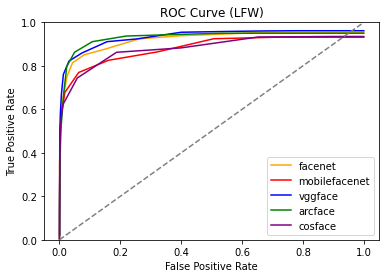

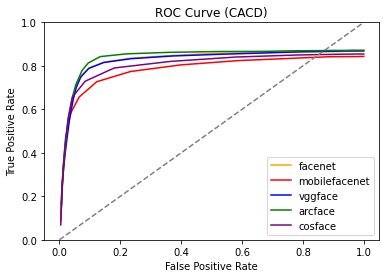

In [59]:
def calculate_roc_curve_recog(df, algorithm, dataset, m=2):
    
    df_filtered = df.query('dataset == @dataset & algorithm == @algorithm')
    default_threshold = df_filtered["tolerance"].iloc[0]
    multiple_list = range((5*m), (30*m), 1)
    thresholds_to_test = [(default_threshold*thresh_multiple/(10*m)) for thresh_multiple in multiple_list]

    true_positives_list, false_positives_list = [], []
    #print()
    for threshold in thresholds_to_test:
        metrics = get_raw_metrics_recog(df_filtered, threshold = threshold)
        ##print(threshold,": ", metrics)
        accuracy, true_positives, true_negatives, false_positives, false_negatives, misclassifications, misrefusals = metrics
        true_positive_rate = true_positives / (true_positives + false_negatives) if ( (true_positives + false_negatives) > 0 ) else 1
        false_positive_rate = false_positives / (false_positives + true_negatives) if ( (false_positives + true_negatives) > 0 ) else 1

        true_positives_list.append(true_positive_rate)
        false_positives_list.append(false_positive_rate)

    
    return true_positives_list, false_positives_list


for dataset in datasets:
    
    fig, ax = plt.subplots()
    
    for algorithm in algorithms:
        
        true_positives_list, false_positives_list = calculate_roc_curve_recog(df_recog, algorithm, dataset)
        # print(true_positives_list)
        # print(false_positives_list)
        ax.plot(false_positives_list, true_positives_list, label=algorithm, color=colors_dict[algorithm])
        ax.set_title(f"ROC Curve ({dataset})")
        ax.set_xlabel("False Positive Rate")
        ax.set_ylabel("True Positive Rate")
    
    ax.plot([0, 1], [0, 1], '--', color="grey")
    ax.legend()
    if(dataset == "CACD"):
        plt.ylim([0.0, 1.0])
    else:
        plt.ylim([0.0, 1.0])
    plt.show()

In [117]:
df_size["total_time"].mean()

0.9671829400577361

## Impact of Dataset Size

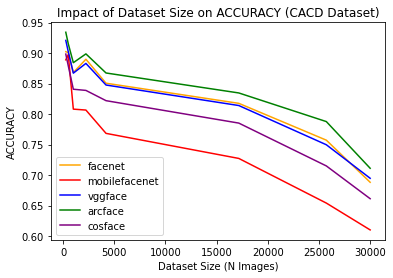

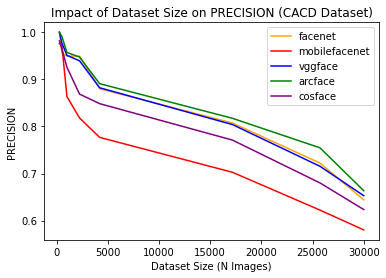

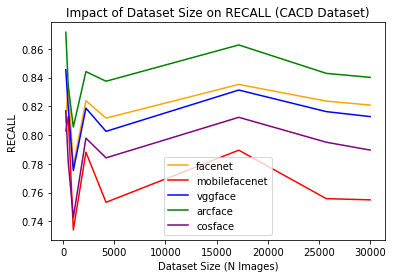

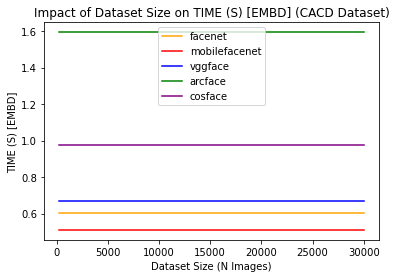

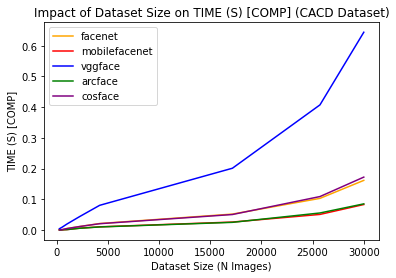

In [239]:
df_cacd = df_recog[df_recog["dataset"] == "CACD"]

n_sizes = list(df_recog["n_images"].unique())
n_sizes.sort()
n_sizes.extend([30000])

for same_person, title_category in [(None, "CACD Dataset")]:
                                    #(None, "Same Person"),
                                    #(None, "Different Person")]:

    data_sizes = [ [[], [], [], [], [], []] for _ in range(len(algorithms)) ]
    x_values = []

    for i in range(len(n_sizes)-1):
        
        n_size = n_sizes[i]
        
        df_size = df_cacd.query(" n_images == @n_size")
        
        

        for j in range(len(algorithms)):

            algorithm = algorithms[j]
            df_temp = df_size.query(" algorithm == @algorithm ")
            
            comparison_time = df_temp["comparison_time"].mean()
            embedding_time = df_temp["total_time"].mean() - comparison_time

            if(df_temp.shape[0] == 0):
                #print("continuing")
                continue

            accuracy, true_positives, true_negatives, false_positives, false_negatives, misclassifications, misrefusals = get_raw_metrics_recog(df_temp)
            fpr = false_positives / (true_positives + false_positives )  if ( (true_positives + false_positives )   > 0 ) else None
            fnr = false_negatives / (true_negatives + false_negatives )  if ( (true_negatives + false_negatives )  > 0 ) else None
            precision = (true_positives) / (true_positives + false_positives) if ( (true_positives + false_positives)  > 0 ) else None
            recall = (true_positives) / (true_positives + false_negatives) if ( (true_positives + false_negatives)  > 0 ) else None
            
            accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
            
            data_sizes[j][0].append(accuracy)
            data_sizes[j][1].append(precision)
            data_sizes[j][2].append(recall)
            data_sizes[j][3].append(embedding_time)
            data_sizes[j][4].append(comparison_time)
            data_sizes[j][5].append(n_sizes[i+1])
            
            

    metrics = ["accuracy", "precision", "recall", "time (s) [embd]", "time (s) [comp]"]
    #metrics = ["Accuracy", "False Positive Rate", "False Negative Rate"]
    for i in range(len(metrics)): 
        fig, ax = plt.subplots()
        for j in range(len(algorithms)):
            algorithm = algorithms[j]
            metric_values = data_sizes[j][i]
            x_values = data_sizes[j][5]
            ax.plot(x_values, metric_values, label=algorithm, color=colors_dict[algorithm])
            
            ax.set_title(f"Impact of Dataset Size on {metrics[i].upper()} ({title_category})")
            ax.set_xlabel(f"Dataset Size (N Images)")
            ax.set_ylabel(f"{metrics[i].upper()}")

        ax.legend()
        plt.show()

## Impact of Images per person

In [108]:
df_cacd["n_images"].unique()

array([18.1       , 14.64      , 15.88      , 17.16      , 17.22      ,
       17.332     , 17.165     , 17.03178808])

<ipython-input-113-ee4043922845>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cacd["n_images"] = df_cacd["n_images"].astype(int)


[18, 14, 15, 17]


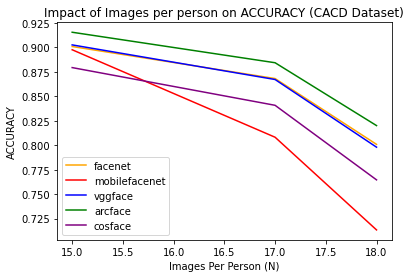

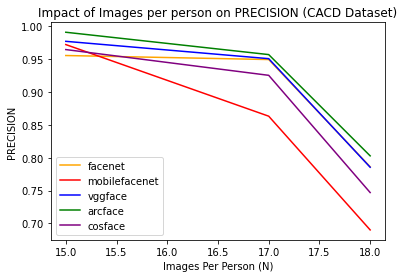

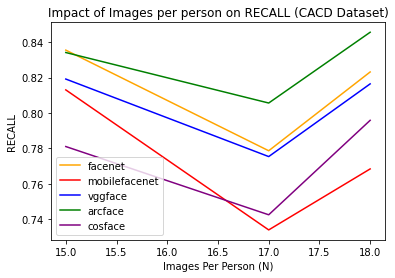

In [113]:
df_cacd = df_recog[df_recog["dataset"] == "CACD"]
#df_cacd["n_images"] = df_cacd["n_images"]/df_cacd["n_people"]
df_cacd["n_images"] = df_cacd["n_images"].astype(int)
n_sizes = list(df_cacd["n_images"].unique())
print(n_sizes)
n_sizes.sort()
#n_sizes.extend([2500])

for same_person, title_category in [(None, "CACD Dataset")]:
                                    #(None, "Same Person"),
                                    #(None, "Different Person")]:

    data_sizes = [ [[], [], [], []] for _ in range(len(algorithms)) ]
    x_values = []

    for i in range(len(n_sizes)-1):
        
        n_size = n_sizes[i]
        
        df_size = df_cacd.query(" n_images == @n_size")

        for j in range(len(algorithms)):

            algorithm = algorithms[j]
            df_temp = df_size.query(" algorithm == @algorithm ")

            if(df_temp.shape[0] == 0):
                #print("continuing")
                continue

            accuracy, true_positives, true_negatives, false_positives, false_negatives, misclassifications, misrefusals = get_raw_metrics_recog(df_temp)
            fpr = false_positives / (true_positives + false_positives )  if ( (true_positives + false_positives )   > 0 ) else None
            fnr = false_negatives / (true_negatives + false_negatives )  if ( (true_negatives + false_negatives )  > 0 ) else None
            precision = (true_positives) / (true_positives + false_positives) if ( (true_positives + false_positives)  > 0 ) else None
            recall = (true_positives) / (true_positives + false_negatives) if ( (true_positives + false_negatives)  > 0 ) else None
            
            accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
            
            data_sizes[j][0].append(accuracy)
            data_sizes[j][1].append(precision)
            data_sizes[j][2].append(recall)
            data_sizes[j][3].append(n_sizes[i+1])
            

    metrics = ["accuracy", "precision", "recall"]
    #metrics = ["Accuracy", "False Positive Rate", "False Negative Rate"]
    for i in range(3): 
        fig, ax = plt.subplots()
        for j in range(len(algorithms)):
            algorithm = algorithms[j]
            metric_values = data_sizes[j][i]
            x_values = data_sizes[j][3]
            ax.plot(x_values, metric_values, label=algorithm, color=colors_dict[algorithm])
            
            ax.set_title(f"Impact of Images per person on {metrics[i].upper()} ({title_category})")
            ax.set_xlabel(f"Images Per Person (N)")
            ax.set_ylabel(f"{metrics[i].upper()}")

        ax.legend()
        plt.show()

## Dynamic thresholding

In [184]:
#df_cacd = df_recog_orig[df_recog_orig["dataset"] == "CACD"].reset_index()
df_cacd = deepcopy(df_recog_orig)
n_sizes = list(df_recog["n_people"].unique())
n_sizes.sort()
#n_sizes.extend([2500])

dynamic_thresholds = {}

df_dynamic = deepcopy(df_cacd)

for algorithm in algorithms:
    
    #print(f"{algorithm}")
    
    threshold_list = []
    for i in range(len(n_sizes)-1):
    
        n_size = n_sizes[i]
        df_temp = df_cacd.query("n_people == @n_size")
    
        best_threshold = get_best_threshold_recog(df_temp, algorithm, weights = [0, 1, 1],)
        
        inds = np.argwhere( np.bitwise_and(df_dynamic["algorithm"].values == algorithm,
                                           df_dynamic["n_people"].values == n_size )).ravel()
        df_dynamic.loc[inds, "tolerance"] = best_threshold
        
        threshold_list.append(best_threshold)
        #print(f"(N: {n_size}) : {best_threshold}")
        
    dynamic_thresholds[algorithm] = threshold_list

df_dynamic["prediction"] = df_dynamic["min_distance"] <= df_dynamic["tolerance"]
#df_recog["correct"] = df_recog["prediction"] == df_recog["same"]
df_dynamic

,dataset,n_people,n_images,algorithm,person,in_dataset,min_distance,tolerance,recognized,correct,...,comparison_time,age,gender,race,min_age_difference,match_name,match_age,match_gender,match_race,prediction
0,LFW,10,17,facenet,Jo_Joong-hyon,False,0.982751,0.9200,True,False,...,0.000000,42,1,0,None,Hu_Maoyuan,58,1,0,False
1,LFW,10,17,mobilefacenet,Jo_Joong-hyon,False,1.304814,0.9750,False,True,...,0.000000,42,1,0,None,Kent_McCord,60,1,1,False
2,LFW,10,17,vggface,Jo_Joong-hyon,False,198.179750,155.4000,False,True,...,0.000000,42,1,0,None,Hu_Maoyuan,58,1,0,False
3,LFW,10,17,arcface,Jo_Joong-hyon,False,0.573611,0.5520,True,False,...,0.000000,42,1,0,None,Hu_Maoyuan,58,1,0,False
4,LFW,10,17,cosface,Jo_Joong-hyon,False,1.321862,1.0664,False,True,...,0.003493,42,1,0,None,Anibal_Ibarra,47,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244480,CACD,1510,25718,facenet,Cameron_Diaz,False,0.677817,0.7400,True,False,...,0.160998,35,None,None,None,Jason_Patric,43,None,None,True
244481,CACD,1510,25718,mobilefacenet,Cameron_Diaz,False,0.919259,0.8750,True,False,...,0.083999,35,None,None,None,Charisma_Carpenter,37,None,None,False
244482,CACD,1510,25718,vggface,Cameron_Diaz,False,107.116010,129.5000,True,False,...,0.647500,35,None,None,None,Jason_Patric,43,None,None,True
244483,CACD,1510,25718,arcface,Cameron_Diaz,False,0.312214,0.4440,True,False,...,0.087500,35,None,None,None,Jason_Patric,43,None,None,True


[]

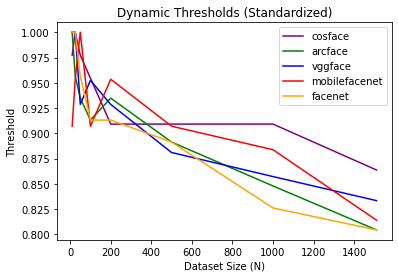

In [186]:
fig, ax = plt.subplots()
for algorithm in algorithms[::-1]:
    x_values = n_sizes[:-1]
    y_values = deepcopy(dynamic_thresholds[algorithm])
    y_values = list(map(lambda x: x/max(y_values), y_values))
    #print(algorithm, y_values)
    ax.plot(x_values, y_values, label=algorithm, color=colors_dict[algorithm])

ax.set_title(f"Dynamic Thresholds (Standardized)")
ax.set_xlabel(f"Dataset Size (N)")
ax.set_ylabel(f"Threshold")
ax.legend()
plt.plot()

In [188]:
results = df_dynamic.groupby(["dataset", "algorithm"]).mean()
results = results[ ["correct", "total_time", "comparison_time"]]
results.columns = ["accuracy",  "total_time", "comparison_time"]
results = results.sort_values(by="dataset", ascending=False)
results = results.apply(lambda row: add_metrics_recog(row, df_recog), axis=1)

integer_columns = ["n_rows", "true_positives", "false_positives", "true_negatives", "false_negatives"]
results[integer_columns ] = results[integer_columns ].astype(int)

float_columns = ["accuracy", "precision", "recall", "total_time", "comparison_time", "TP_rate", "FP_rate", "misclassifications", "misrefusals"]
results[float_columns] = results[float_columns].round(3)

#true_negatives_rate
ordered_columns = ["accuracy", "precision", "recall", "FP_rate",  "n_rows", "true_positives", "false_positives", "true_negatives", "false_negatives", "misclassifications", "misrefusals",  "total_time", "comparison_time"]
#results[ordered_columns]

## 99.5% True Positive Rate

In [235]:
print("Thresholds for 99.5% True Verification Rate\n")

df_test = deepcopy(df_recog_orig)
df_test = df_recog_orig[df_recog_orig["dataset"] == "LFW"].reset_index()


for algorithm in algorithms:
    best_threshold = get_best_threshold_recog(df_test, algorithm, max_fdr = 5/1000)
    inds = np.argwhere(df_test["algorithm"].values == algorithm).ravel()
    df_test.loc[inds, "tolerance"] = best_threshold
    #print(f"{algorithm} : {round(best_threshold, 3)}")

df_test["prediction"] = df_test["min_distance"] <= df_test["tolerance"]
#df_test["correct"] = df_test["prediction"] == df_test["correct"]



results = df_test.groupby(["dataset","algorithm"]).mean()
results = results[ ["correct", "total_time", "comparison_time"]]
results.columns = ["accuracy",  "total_time", "comparison_time"]
results = results.sort_values(by="dataset", ascending=False)
results = results.apply(lambda row: add_metrics_recog(row, df_test), axis=1)

integer_columns = ["n_rows", "true_positives", "false_positives", "true_negatives", "false_negatives"]
results[integer_columns ] = results[integer_columns ].astype(int)

float_columns = ["accuracy", "precision", "recall", "total_time", "comparison_time", "TP_rate", "FP_rate", "misclassifications", "misrefusals"]
results[float_columns] = results[float_columns].round(3)

#true_negatives_rate
ordered_columns = ["accuracy", "precision", "recall", "FP_rate",  "n_rows", "true_positives", "false_positives", "true_negatives", "false_negatives", "misclassifications", "misrefusals",  "total_time", "comparison_time"]
results[ordered_columns].reset_index().drop(["dataset", "n_rows"], axis=1).set_index("algorithm")

Thresholds for 99.5% True Verification Rate



,accuracy,precision,recall,FP_rate,true_positives,false_positives,true_negatives,false_negatives,misclassifications,misrefusals,total_time,comparison_time
algorithm,,,,,,,,,,,,
arcface,0.665,0.995,0.334,0.002,4119,19,12168,8201,13.0,8188.0,1.597,0.003
cosface,0.713,0.995,0.432,0.002,5324,26,12161,6996,8.0,6988.0,0.981,0.007
facenet,0.703,0.995,0.412,0.002,5072,25,12162,7248,4.0,7244.0,0.609,0.007
mobilefacenet,0.722,0.996,0.448,0.002,5519,21,12166,6801,8.0,6793.0,0.513,0.003
vggface,0.782,0.995,0.569,0.003,7015,35,12152,5305,5.0,5300.0,0.694,0.027
